In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy.stats as st
import time
from scipy.stats import multivariate_normal as mn
import matplotlib.pyplot as plt
import pdb
from numpy import save
from random import sample 
from math import pi
from sklearn.neighbors import NearestNeighbors as NN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from fcmeans import FCM
from sklearn.datasets import make_blobs
import seaborn as sns
import random
import pdb 
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

import pickle
%matplotlib inline

C:\Users\johan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv(r'datasets\full_df.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550217 entries, 0 to 1550216
Data columns (total 21 columns):
user_id             1550217 non-null object
song_id             1550217 non-null object
listen_count        1550217 non-null int64
title               1550217 non-null object
release             1550217 non-null object
artist_name         1550217 non-null object
year                1550217 non-null int64
raw_ratings         1550217 non-null int64
queery              1550217 non-null object
ids                 1550217 non-null object
filter_que          1550217 non-null object
danceability        1550217 non-null float64
acousticness        1550217 non-null float64
energy              1550217 non-null float64
instrumentalness    1550217 non-null float64
key                 1550217 non-null float64
liveness            1550217 non-null float64
loudness            1550217 non-null float64
mode                1550217 non-null float64
tempo               1550217 non-null float64
v

In [3]:
df.head(5)

user_id             song_id  listen_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B             2   
1  930d2be6c85315d72cab9823ec0f7bfe7e477794  SOBBMDR12A8C13253B             1   
2  41c12ce05f18b757d9257e5ad4f8303b4b8a8758  SOBBMDR12A8C13253B            66   
3  f8611810514c93d57bb846aa0b5e0410d9730a14  SOBBMDR12A8C13253B             2   
4  5968a59e582f434a223b3786cd51c9f4690b38d4  SOBBMDR12A8C13253B             6   

             title              release    artist_name  year  raw_ratings  \
0  Entre Dos Aguas  Flamenco Para Niños  Paco De Lucia  1976            2   
1  Entre Dos Aguas  Flamenco Para Niños  Paco De Lucia  1976            1   
2  Entre Dos Aguas  Flamenco Para Niños  Paco De Lucia  1976           20   
3  Entre Dos Aguas  Flamenco Para Niños  Paco De Lucia  1976            2   
4  Entre Dos Aguas  Flamenco Para Niños  Paco De Lucia  1976            6   

                                              queery  \
0  Entre Dos Aguas artist:Paco De Lucia album:Fla...   
1  Entre Dos Aguas artist:Paco De Lucia album:Fla...   
2  Entre Dos Aguas artist:Paco De Lucia album:Fla...   
3  Entre Dos Aguas artist:Paco De Lucia album:Fla...   
4  Entre Dos Aguas artist:Paco De Lucia album:Fla...   

                                    ids  ... danceability  acousticness  \
0  spotify:track:3Fgk17TfdjXWFroJy29pXH  ...        0.458         0.933   
1  spotify:track:3Fgk17TfdjXWFroJy29pXH  ...        0.458         0.933   
2  spotify:track:3Fgk17TfdjXWFroJy29pXH  ...        0.458         0.933   
3  spotify:track:3Fgk17TfdjXWFroJy29pXH  ...        0.458         0.933   
4  spotify:track:3Fgk17TfdjXWFroJy29pXH  ...        0.458         0.933   

   energy  instrumentalness  key  liveness  loudness  mode   tempo  valence  
0   0.657             0.878  4.0    0.0842    -12.02   0.0  102.45    0.914  
1   0.657             0.878  4.0    0.0842    -12.02   0.0  102.45    0.914  
2   0.657             0.878  4.0    0.0842    -12.02   0.0  102.45    0.914  
3   0.657             0.878  4.0    0.0842    -12.02   0.0  102.45    0.914  
4   0.657             0.878  4.0    0.0842    -12.02   0.0  102.45    0.914  

[5 rows x 21 columns]

In [4]:
feats =['danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'tempo',
 'valence']

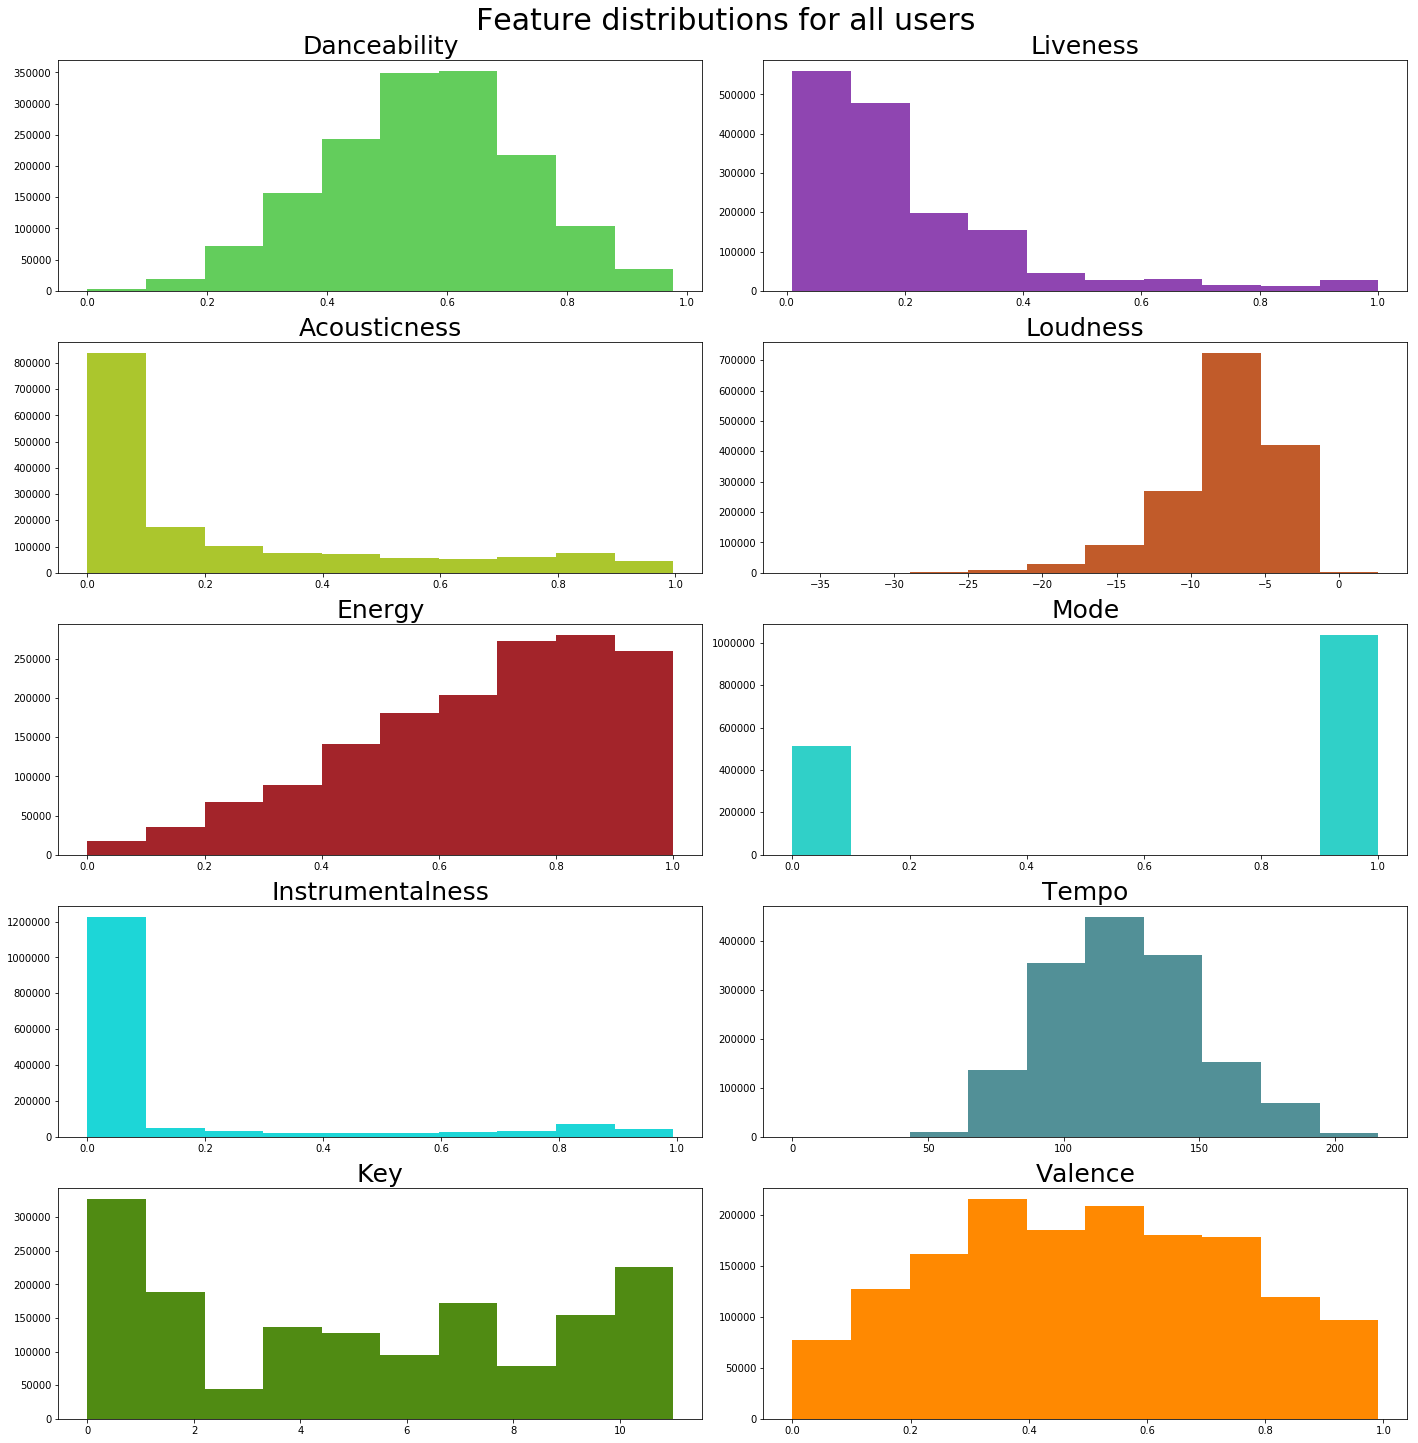

In [5]:
fig, axs = plt.subplots(5,2,figsize=(20,20))
#fig.figsize=((20,20))

fig.tight_layout(pad=3)
fig.suptitle('Feature distributions for all users',fontsize=30,y=1.013)
for i,k in enumerate(feats):
    if i<5:
        axs[i,0].hist(df[k].values,color=np.random.rand(3,))
        axs[i,0].set_title(k.capitalize(),fontsize=25)
        
    else:
        axs[i-5,1].hist(df[k].values,color=np.random.rand(3,))
        axs[i-5,1].set_title(k.capitalize(),fontsize=25)
name= 'df_distribution'
#fig.savefig(rf'C:\Users\johan\Documents\GitHub\Thesis\plots\{name}.png')

In [6]:
class content_based_filtering():
    """Test test"""
    def __init__(self,data):
        df = data
        df.sort_values('user_id',inplace=True)
        self.features = [
        'danceability',
        'acousticness',
        'energy',
        'instrumentalness',
        'key',
        'liveness',
        'loudness',
        'mode',
        'tempo',
        'valence']
        self.info = ['user_id',
        'song_id',
        'listen_count',
        'title',
        'release',
        'artist_name',
        'year',
        'raw_ratings',
        'queery',
        'ids',
        'filter_que']
        self.df = df
    def scale(self):
        scaled=StandardScaler().fit_transform(self.df[self.features])
        self.scaled_df = pd.DataFrame(scaled,columns=self.features)
        self.scaled_df[self.info]=self.df[self.info]
        #self.scaled_df.set_index('user_id',inplace=True)
        self.users = self.scaled_df.user_id.unique().tolist()
    
          
        self.scaled_df.set_index('user_id',inplace=True)
        self.scaled_df.sort_index(inplace=True)
        
    def transform(self,size=1000,drop_bad_data=True,full=False):
        if full:
            self.size = len(self.users)
        else:
            self.size=size
        if drop_bad_data : #taking away binary and categorical values for normal approx
            self.features = [
            'danceability',
            'acousticness',
            'energy',
            'instrumentalness',
            #'key',
            'liveness',
            'loudness',
            #'mode',
            'tempo',
            'valence']
        
        
    def transform():
        start = time.time()
        size=self.size
        self.transformed = [] #creating an array for the transformed variables
        #print(transformed.shape)
        self.lambda_values = np.empty((size)) #array for each lambda value

        print('Transforming values with Yeo Johnson')
        for i,current_user in enumerate(self.users[0:self.size]):
            if i%1000==0:
                print((i/len(self.users[0:self.size]))*100, '%')
            for count,feature in enumerate(self.features):
                a,self.lambda_values[i] = stats.yeojohnson(self.scaled_df.loc[current_user,feature].values)      
                self.transformed.append(a)

        print(time.time()-start)
    def approx_normal(self,size,full=False,drop_bad_data=False):
        self.size=size
        print('Approximating each user feature space with multivariate Gaussian')
        features = self.features
        start= time.time()
        if full:
            size = len(self.users)
        means = np.empty((size,10))
        #stds = np.empty_like(means)
        covs = np.empty((size,10,10))
        
        
             
        
        for i,k in enumerate(self.users[0:size]):            
            if i%10000 == 0:
                print(i)
            if type(self.scaled_df.loc[k,self.features]) != pd.core.frame.DataFrame: #If there's only one observation there
                means[i],covs[i]=self.scaled_df.loc[k,self.features].values,np.zeros((10,10)) #,np.zeros(10)
            else:
                #means[i],stds[i]= weighted_avg_and_std(i,df.loc[k,features].values, df.loc[k,'listen_count'].values)
                means[i]= np.average(self.scaled_df.loc[k,features].values,
                                     weights=self.scaled_df.loc[k,'listen_count'].values,axis=0)
                covs[i] = np.cov(self.scaled_df.loc[k,features].values,
                                 rowvar=0,fweights=self.scaled_df.loc[k,'listen_count'].values)
        print(time.time()-start)
        self.means,self.covs= means,covs
        
        

    
    def approx_user(self,user=None,random_user=True):
        #Get the right index from our user list to map over to our distribution paramters
        if random_user:
            self.user = sample(self.users[:len(self.means)-1],1)
            print(f'user sample: {self.user[0]}')
        else:
            self.user = user
        index = self.users.index(self.user[0])
        #Generate 100 random songs and pick the mean value from these 
        song = [np.random.multivariate_normal(self.means[index],self.covs[index],1).T]
        self =song
    def approx_all(self):
        features = [np.random.multivariate_normal(self.means[index],self.covs[index],1).T for
                   index in range(0,self.size)]
        
        user_profile = [self.scaled_df.loc[user,'ids'].to_list() if 
                        type(self.scaled_df.loc[user,'ids']) != str else 
                        self.scaled_df.loc[user,'ids']
                        for user in self.users[:self.size]
                        ]
        df = pd.DataFrame({'User':self.users[:self.size],'Actual':user_profile,'features':features})
        return df

# DF1 only contains users that has listened to more than 10 songs

In [7]:
counts = df['user_id'].value_counts()
large = counts[counts>10]
df1 = df.copy()
df1.set_index('user_id',inplace=True)
df1 = df1.loc[large.index,:]
df1.reset_index(inplace=True)
len(df1)



1347089

In [8]:
cont= content_based_filtering(df1)
cont.scale()
#cont.transform()
cont.approx_normal(100)

Approximating each user feature space with multivariate Gaussian
0
0.5870325565338135


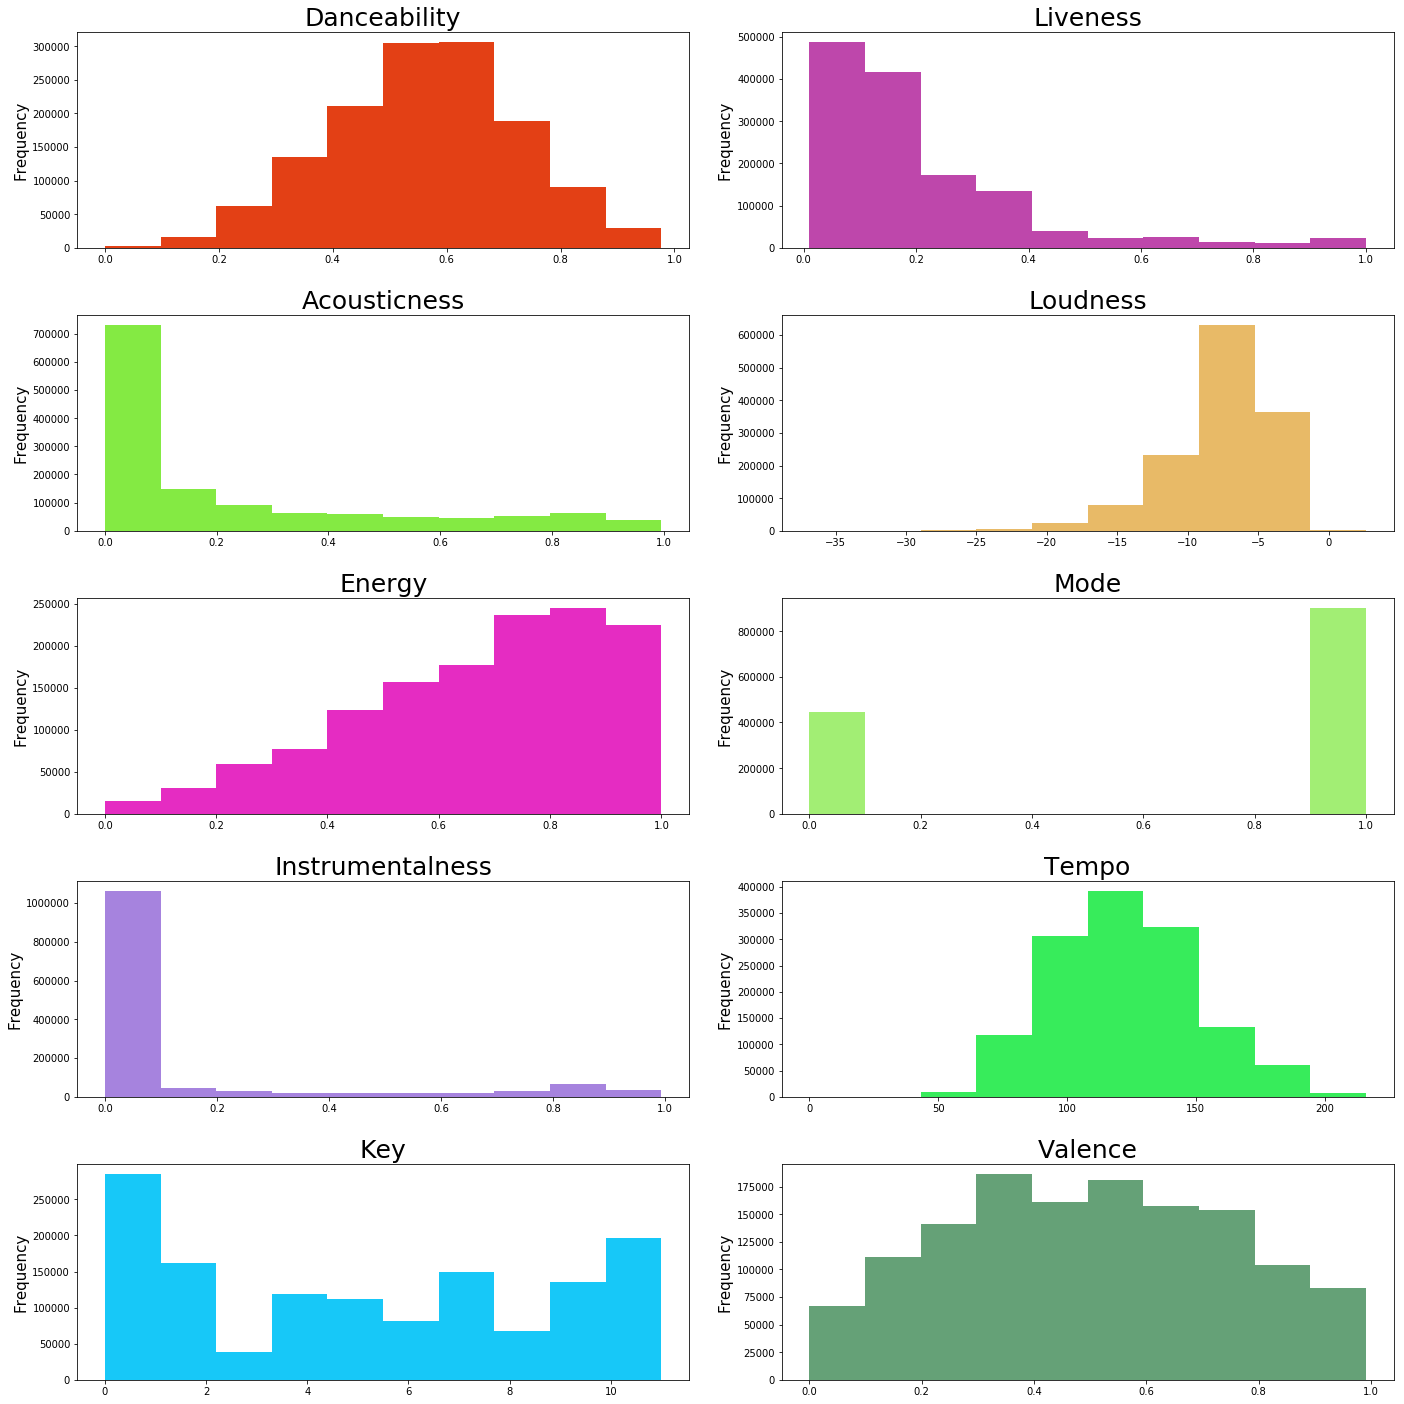

In [16]:
fig, axs = plt.subplots(5,2,figsize=(20,20))
#fig.figsize=((20,20))
feats = cont.features

for i,k in enumerate(feats):
    if i<5:
        axs[i,0].hist(df1[k].values,color=np.random.rand(3,))
        axs[i,0].set_title(k.capitalize(),fontsize=25)
        axs[i,0].set_ylabel('Frequency',fontsize=15)
        
    else:
        axs[i-5,1].hist(df1[k].values,color=np.random.rand(3,))
        axs[i-5,1].set_ylabel('Frequency',fontsize=15)
        axs[i-5,1].set_title(k.capitalize(),fontsize=25)
fig.tight_layout(pad=2.5)
#fig.suptitle('Feature distributions for users with listen count above 10',fontsize=30,y=1.013)
name= 'high_listener_df_distribution'
fig.savefig(rf'plots\{name}.png')

### Transformation of variables
### skip this if you're doing all transform

In [8]:
#Create a dict containing a empty list of features for each user
size=10
#stuff = dict.fromkeys(cont.users[0:10],{})
stuff  = {key: None for key in cont.users[0:size]}
for i in stuff.keys():
    stuff[i] = {key: [] for key in cont.features}
    stuff[i]['Listen_count'] = []
stuff[i]

{'danceability': [],
 'acousticness': [],
 'energy': [],
 'instrumentalness': [],
 'key': [],
 'liveness': [],
 'loudness': [],
 'mode': [],
 'tempo': [],
 'valence': [],
 'Listen_count': []}

#### Since the averages and covs need to be weighted the listen count needs to be taking into account

In [9]:
for i,user in enumerate(cont.users[0:size]): #did this in a new loop to split the below loop a little
    stuff[user]['Listen_count'] = cont.scaled_df.loc[user,'listen_count'].values

## Perform Yeo Johnson on complete dataset

In [7]:
#start = time.time()


In [9]:
trans  = {key: [] for key in list(set(cont.features) - set(['mode','key']))}
trans.keys()

dict_keys(['liveness', 'acousticness', 'energy', 'valence', 'tempo', 'danceability', 'loudness', 'instrumentalness'])

In [155]:
aa = len(cont.scaled_df)
def create_trans(data,features=cont.features,dropped_variables=['mode','key']):
    """Function to create a dataframe with Yeo Johnson transformed variables
    - Dropped_variables: Those that are to not be transformed and included in dataset
    
    """
    # Dict that will stort all the transformed values 
    trans  = {key: [] for key in list(set(cont.features) - set(dropped_variables))}
    #trans.keys()
    
    #to store all variable lamdas that are fitted to the transformation
    lambdas = np.zeros(10)
    for i,k in enumerate(trans.keys()):
        print(f'Doing Yeo for {k}')
        trans[k],lambdas[i]= stats.yeojohnson(data[k])

    
    print('Creating dataframe with transformed variables')
    trans_df = pd.DataFrame.from_dict(trans)
    trans_df['listen_count'] = data.listen_count.values
    trans_df['title'] = data.title.values
    trans_df['ids'] = data.ids.values
    trans_df['user']= data.index.values
    trans_df['artist']=data.artist_name.values
    trans_df.set_index('user',inplace=True)
    return trans_df,lambdas


dropped= []#['mode','key','instrumentalness','acousticness']
trans_df,lambdas = create_trans(cont.scaled_df,dropped_variables=dropped)
trans_df.head()

Doing Yeo for key
Doing Yeo for liveness
Doing Yeo for mode
Doing Yeo for danceability
Doing Yeo for valence
Doing Yeo for acousticness
Doing Yeo for instrumentalness
Doing Yeo for energy
Doing Yeo for tempo
Doing Yeo for loudness
Creating dataframe with transformed variables


key  liveness      mode  \
user                                                                     
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67 -0.329237 -0.826428  1.175141   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  1.567890  0.361371 -0.669830   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67 -0.329237 -0.284523  1.175141   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67 -0.902934 -0.211220  1.175141   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  1.039740 -0.307518  1.175141   

                                          danceability   valence  \
user                                                               
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67      1.787747  1.280556   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67      0.702738 -0.788988   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     -1.925333  0.320696   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     -0.436816  0.503030   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     -0.758870 -0.541711   

                                          acousticness  instrumentalness  \
user                                                                       
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     -0.937044         -1.001809   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67      0.441564         -0.981118   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     -0.817473         -1.001851   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     -1.093743         -1.000602   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     -1.292577         -0.999485   

                                            energy     tempo  loudness  \
user                                                                     
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67 -0.402643  0.282111 -0.131574   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67 -0.776760 -1.041491  1.057030   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  0.336312  2.034118 -0.548074   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  1.302307  1.219310  0.865253   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  0.978061 -1.300389  1.379787   

                                          listen_count                  title  \
user                                                                            
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67             9  You Get What You Give   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67             3    Un Beso de Desayuno   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67             1          Enter Sandman   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67             1          Down To Earth   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67             1     Livin' On A Prayer   

                                                                           ids  \
user                                                                             
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  spotify:track:1Cwsd5xI8CajJz795oy4XF   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  spotify:track:4NXb9ohwcrT5hZ3HOdIN7c   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  spotify:track:5BIMPccDwShpXq784RJlJp   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  spotify:track:1q9pBaYcydq7LyYwD8SEBs   
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  spotify:track:6LqhMIfxCPBhaRdV0oaek3   

                                                 artist  
user                                                     
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67   New Radicals  
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67       Calle 13  
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67      Metallica  
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  Justin Bieber  
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67       Bon Jovi

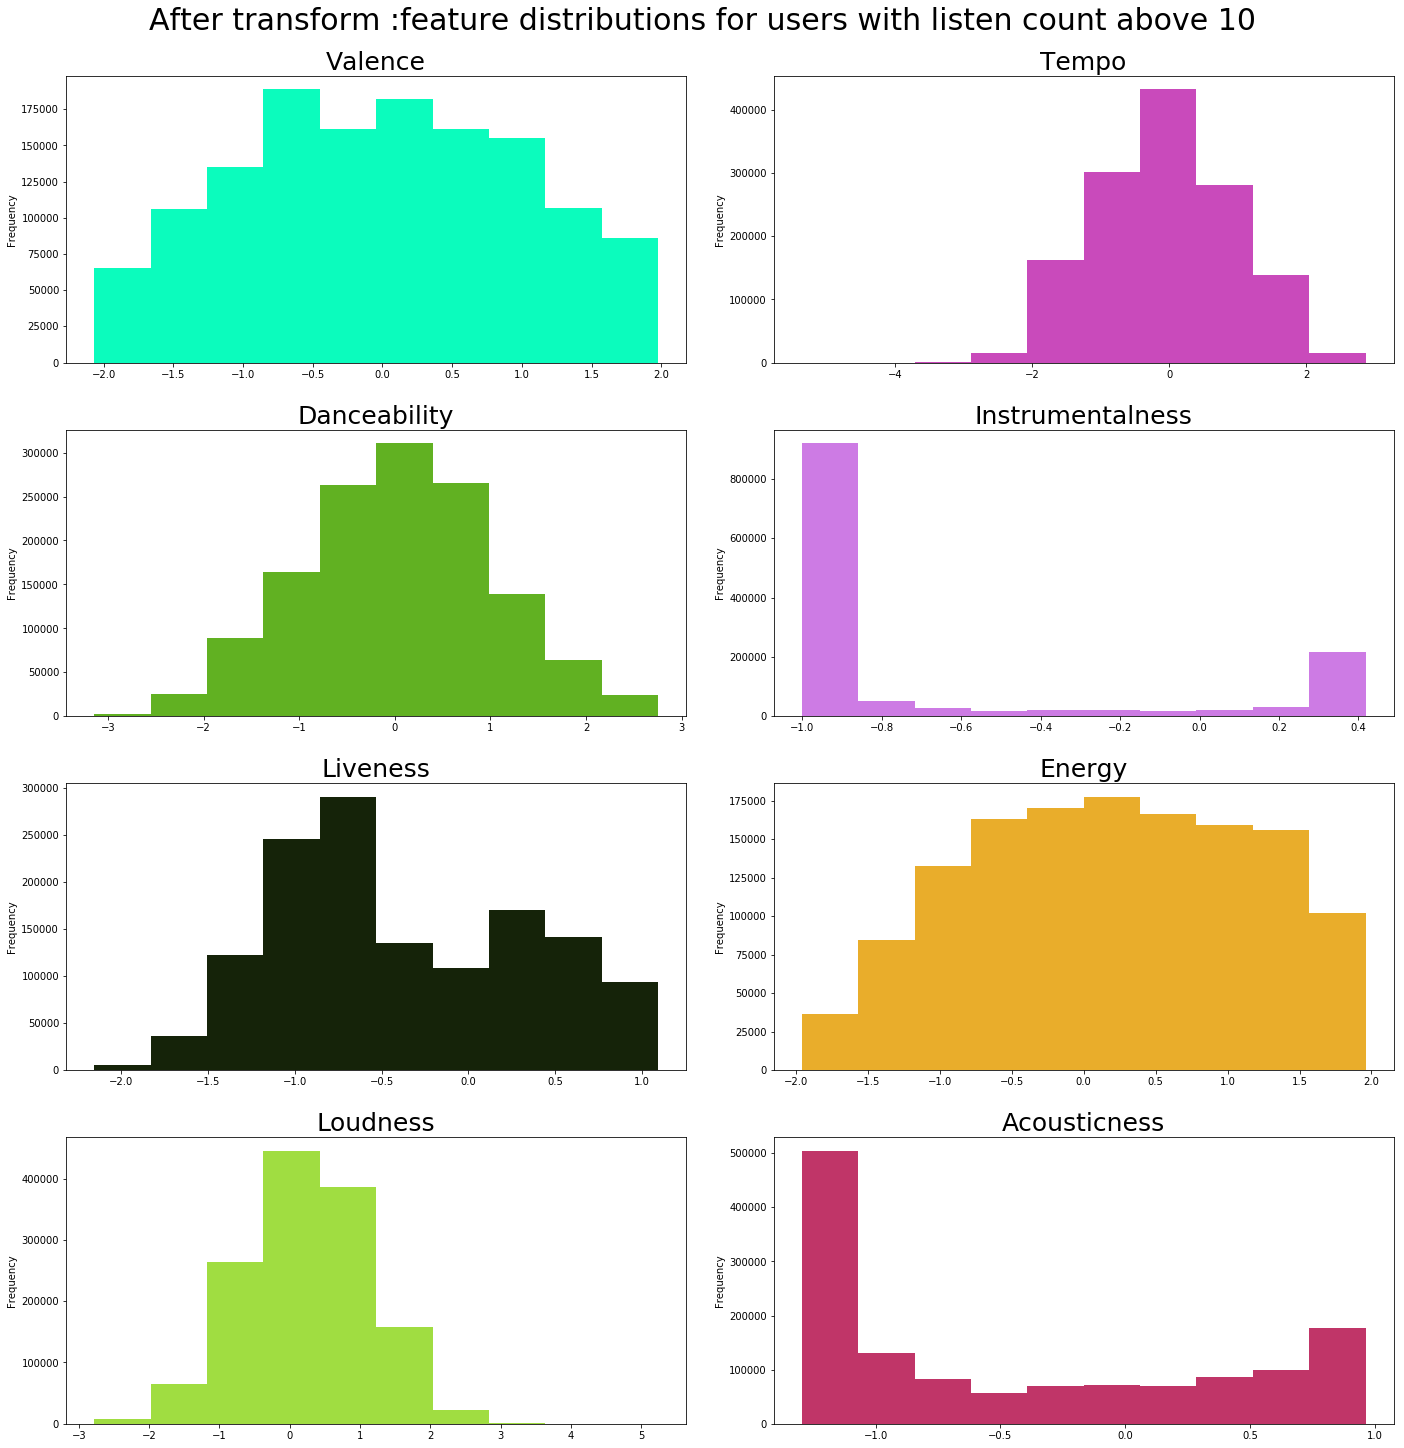

In [80]:
fig, axs = plt.subplots(4,2,figsize=(20,20))
#fig.figsize=((20,20))
feats = list(set(cont.features) -set(['mode','key']))

for i,k in enumerate(feats):
    if i<4:
        axs[i,0].hist(trans_df[k].values,color=np.random.rand(3,))
        axs[i,0].set_title(k.capitalize(),fontsize=25)
        axs[i,0].set(ylabel='Frequency')
        
    else:
        axs[i-4,1].hist(trans_df[k].values,color=np.random.rand(3,))
        axs[i-4,1].set(ylabel='Frequency')
        axs[i-4,1].set_title(k.capitalize(),fontsize=25)
fig.tight_layout(pad=2.5)
fig.suptitle('After transform :feature distributions for users with listen count above 10',fontsize=30,y=1.013)
name= 'high_listener_df_distribution_after_transformation'
#fig.savefig(rf'C:\Users\johan\Documents\GitHub\Thesis\plots\{name}.png')

#### Perform Yeo Johnson transformation on each featuer for each user
##### Also to be skipped if you did on all variables using the function

In [87]:
transformed_df = pd.DataFrame({
    'danceability':np.array(),
    'acousticness':a[1],
    'energy':a[2],
    'instrumentalness':a[3],
    #'key':a[4],
    'liveness':a[5],
    'loudness':a[6],
    #'mode':a[7],
    'tempo':a[8],
    'valence':a[9]

(1347089,)

In [16]:
start = time.time()
#size=10

lambda_values = np.empty((size)) #array for each lambda value

print('Transforming values with Yeo Johnson')
for i,current_user in enumerate(cont.users[0:size]):
    if i%1000==0:
        print((i/len(cont.users[0:size]))*100, '%')
    for count,feature in enumerate(cont.features): 
        stuff[current_user][feature], lambda_values[i] =stats.yeojohnson(
            cont.scaled_df.loc[current_user,feature].values)

print(time.time()-start)

Transforming values with Yeo Johnson
0.0 %
0.20026063919067383


### Approx based on full transformation

In [156]:
#further_dropped= ['mode','key','Acousticness','Instrumentalness']
selected = list(set(cont.features) - set(dropped))

In [56]:
def approx_normals(size,feats=selected,data = trans_df,all=True):
    """Calculates the mean and covariance matrices for the users 
    - size = how many users you want to approximate
    - dropped - which features don't you want to approximate on
    - data - dataset to be approximated, can be a trainset
    - all : if you want to approx on all, if false you pass in train set for user
    """
    #selected = list(set(cont.features) - set(dropped))
    means = np.zeros((size,8))
    covs= np.zeros((size,8,8))
    start= time.time()
    #if all:
    for count,user in enumerate(cont.users[0:size]):
        if count%1000 == 0:
            print(count)
        means[count]= np.average(data.loc[user,feats],axis=0,weights=data.loc[user,'listen_count'])
        covs[count] = np.cov(data.loc[user,feats],fweights= data.loc[user,'listen_count'],rowvar=False)

    print(time.time()-start)
    #else:
        
    
    return means,covs
size=100
means,covs = approx_normals(size)

0
0.945270299911499


### Calculate liklihood of songs for each user

In [51]:
songs = trans_df.drop_duplicates(subset=['ids'], keep='first')
songs.reset_index(drop=True,inplace=True)

In [157]:
def calc_normal(song,mean,cov):
    return stats.multivariate_normal.pdf(song,mean,cov)

In [57]:
def calc_like(size,users=cont.users,features=cont.features,feats=selected):
    #Creating dataframe that will hold everything
    users = users[0:size] #scale if we dont want all
    
    columns = ['ids','title','artist','prob']
    y= pd.DataFrame(columns=columns)
    
    recs = {key: y for key in users[0:size]} # Create dict that will hold all data
    #feats =list(set(features) - set(dropped_var)) #extracting the features that we want

    print(f'Getting probs for {size} users')
    start= time.time()
    #Function that takes in and calculates liklihood for all songs for n users
    for count,user in enumerate(users):
        if count%1000==0:
            print(count)
        recs[user].prob = calc_normal(songs[feats],means[count],covs[count])
        #recs[user].ids = songs.ids
        #recs[user].title = songs.title
        #recs[user].artist = songs.artist
    print(time.time()-start)
    return recs,feats

size=10
recs,feats = calc_like(size)

Getting probs for 10 users
0
0.07982897758483887


### Creating dataframe to store each user prediction and songs

In [58]:
#start=time.time()
a = pd.DataFrame({'ids':songs.ids.values,
             'prob':recs['6d625c6557df84b60d90426c0116138b617b9449'].prob.values}).sort_values(by='prob',
                                                                 ascending=False).head(10)
[a.prob.values]
#print(time.time()-start)

[array([0.00437828, 0.00437828, 0.00432173, 0.00432173, 0.00432173,
        0.00432173, 0.00432173, 0.00432173, 0.00432173, 0.00432173])]

In [59]:
def get_user_recs(songs,probs,titles,artists,ids):
    #two approaches for this func
    # 1. Take the ID of a song, sort all values and left merge with songs_df
    #2. Take list of everything thats already sorted - build a frame and cut the rest
    
    #appr 2
    a = pd.DataFrame({'ids':songs.ids.values,
             'prob':prob.values}).sort_values(by='prob',ascending=False).head(10)
    return [a.prob.values],[a.ids.values]
    

In [ ]:
#all_recs = pd.DataFrame({'users':recs})

In [60]:
example_user= '6d625c6557df84b60d90426c0116138b617b9449'
te= pd.DataFrame({'title':songs.title,
                  'artist':songs.artist,
                  'id':songs.ids,
                 'prob':recs[example_user].prob})

### Songs we recommend

In [61]:
te.sort_values(by='prob',ascending=False,inplace=True)
te.reset_index(drop=True,inplace=True)
te.head(10).to_csv('top_recs_content.csv')

title                        artist  \
0      California English               Vampire Weekend   
1         Bad Moon Rising  Creedence Clearwater Revival   
2              Standpoint              Full Blown Chaos   
3                 The Rip                    Portishead   
4                    Pogo                    Digitalism   
5  Right Now (Radio Edit)                 Atomic Kitten   
6                  Hunter                          Dido   
7         Girls Dem Sugar                    Beenie Man   
8   I Can See Clearly Now                  Donny Osmond   
9           Prelude 12/21                           AFI   

                                     id      prob  
0  spotify:track:616yWUonrccM3bckt85yC5  0.004378  
1  spotify:track:20OFwXhEXf12DzwXmaV7fj  0.004378  
2  spotify:track:6qstllWeU0Jk1x8FIIrCOQ  0.004322  
3  spotify:track:5KX2DSPC6aCA0pdDidTmBC  0.004322  
4  spotify:track:4CLZlTPjaKqbadAJc031OQ  0.004322  
5  spotify:track:0YMRK4CjCQq8iXZwszw5Uz  0.004322  
6  spotify:track:5RfAE6BeGzLX9fIcuq8iAL  0.004322  
7  spotify:track:5LToG7DzmhDPnr60ZEzFUH  0.004322  
8  spotify:track:2C6xVotHUsARKluY93gplQ  0.004322  
9  spotify:track:6hxa24dKfCoe1EA6g0RHNw  0.004322

In [63]:
te.head(10).to_csv('top_recs_content.csv')

In [73]:
top10_recs = te.head(10).id.values #storing the top 10 songs we recommend
top10_recs

array(['spotify:track:6eFCBLZvg1yaF8mMShZPcd',
       'spotify:track:6FXwTBdpv4wD0G0Sz3Wxn4',
       'spotify:track:44OxoDksTnkbNXW9OxiHgg',
       'spotify:track:4S06iZrLlGsSqKlK6paOv8',
       'spotify:track:20F3FcES8KU4kffMCkFgNN',
       'spotify:track:776wdb7j6xJuLJDVay0zww',
       'spotify:track:2iQzGiBMP2V6F3his5xnxH',
       'spotify:track:3Fk9DHmgDDPX2kTbyNTkUY',
       'spotify:track:47qzx5WwQpMI2ItFqLeIkP',
       'spotify:track:2k2McMgls2mmZBGLoAPbwJ'], dtype=object)

In [74]:
mask = (te['title']=='The Police And The Private')
te[mask]

title  artist  \
5939  The Police And The Private  Metric   

                                        id      prob  
5939  spotify:track:22rkCRquWCsGYoFyQV6Uuu  0.000028

### The actual songs he listened too

In [62]:
top10_listen=trans_df.loc[example_user,
             ['title','artist','ids','listen_count']].sort_values(by='listen_count',
                                                            ascending=False).head(10)
top10_listen

title  \
user                                                                         
6d625c6557df84b60d90426c0116138b617b9449                      Can You Tell   
6d625c6557df84b60d90426c0116138b617b9449        The Police And The Private   
6d625c6557df84b60d90426c0116138b617b9449                           Invalid   
6d625c6557df84b60d90426c0116138b617b9449                   Shadow Stabbing   
6d625c6557df84b60d90426c0116138b617b9449                     Red Dirt Road   
6d625c6557df84b60d90426c0116138b617b9449        Swing Life Away (Acoustic)   
6d625c6557df84b60d90426c0116138b617b9449  Pursuit Of Happiness (nightmare)   
6d625c6557df84b60d90426c0116138b617b9449                         Enterlude   
6d625c6557df84b60d90426c0116138b617b9449              Don't Trust The Kids   
6d625c6557df84b60d90426c0116138b617b9449                        I Miss You   

                                                             artist  \
user                                                                  
6d625c6557df84b60d90426c0116138b617b9449                 Ra Ra Riot   
6d625c6557df84b60d90426c0116138b617b9449                     Metric   
6d625c6557df84b60d90426c0116138b617b9449                   Tub Ring   
6d625c6557df84b60d90426c0116138b617b9449                       Cake   
6d625c6557df84b60d90426c0116138b617b9449              Brooks & Dunn   
6d625c6557df84b60d90426c0116138b617b9449               Rise Against   
6d625c6557df84b60d90426c0116138b617b9449  Kid Cudi / MGMT / Ratatat   
6d625c6557df84b60d90426c0116138b617b9449                The Killers   
6d625c6557df84b60d90426c0116138b617b9449                      Ashra   
6d625c6557df84b60d90426c0116138b617b9449                    Incubus   

                                                                           ids  \
user                                                                             
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:4oGxamtwbBAU2Ld7zoaUuP   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:22rkCRquWCsGYoFyQV6Uuu   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:75cTfyv2XauL07tPoXQFlf   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:2yxkvnyno37480Hv1wuAee   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:5QHElgktygMkgRdpPhXfn2   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:2wDHQfRlxKnKhPsnYb8KDF   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:5iSEsR6NKjlC9SrIJkyL3k   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:4pTvgNra8siMoIT8u3epTr   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:0utjbAGFJCBUPPYXm3MAph   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:0ZVorBFSmsJBE0pczFzIvk   

                                          listen_count  
user                                                    
6d625c6557df84b60d90426c0116138b617b9449           225  
6d625c6557df84b60d90426c0116138b617b9449           146  
6d625c6557df84b60d90426c0116138b617b9449           105  
6d625c6557df84b60d90426c0116138b617b9449            94  
6d625c6557df84b60d90426c0116138b617b9449            56  
6d625c6557df84b60d90426c0116138b617b9449            50  
6d625c6557df84b60d90426c0116138b617b9449            35  
6d625c6557df84b60d90426c0116138b617b9449            34  
6d625c6557df84b60d90426c0116138b617b9449            26  
6d625c6557df84b60d90426c0116138b617b9449            25

In [64]:
top10_listen.reset_index(drop=True,inplace=True)
top10_listen.to_csv('top10actual_user.csv')

In [80]:
top10_listenids = top10_listen.ids.values

### Adding the top 10's listen count songs to the plotting

In [76]:
emp=[]
for i in range(10):#top10_listen.listen_count:
    emp+= [list(top10_listen.ids)[i] for x in range(list(top10_listen.listen_count)[i])]
    #emp.append(xx)
tet = pd.DataFrame({'ids':emp})
tet = tet.merge(songs,how='left',on='ids')
tet['title'].value_counts()
tet.drop(columns=['title','artist','listen_count'],inplace=True)
tet['class'] = 'Listen'
tet.head(1)

ids   valence  acousticness  danceability  \
0  spotify:track:4oGxamtwbBAU2Ld7zoaUuP  0.056408     -0.283904      0.263326   

   liveness  instrumentalness    energy     tempo  loudness   class  
0 -0.299801          0.390473 -0.460872  1.835589 -0.471822  Listen

In [77]:
plotting= trans_df.loc[example_user,feats]
plotting['ids'] = trans_df.loc[example_user,'ids']
plotting['class']='Other'

In [78]:
plotting.head()

valence  acousticness  \
user                                                               
6d625c6557df84b60d90426c0116138b617b9449  0.850298     -1.270616   
6d625c6557df84b60d90426c0116138b617b9449  1.661177      0.431482   
6d625c6557df84b60d90426c0116138b617b9449 -1.857458      0.720254   
6d625c6557df84b60d90426c0116138b617b9449 -1.223309      0.841858   
6d625c6557df84b60d90426c0116138b617b9449 -0.328035      0.475364   

                                          danceability  liveness  \
user                                                               
6d625c6557df84b60d90426c0116138b617b9449     -0.501766  0.258835   
6d625c6557df84b60d90426c0116138b617b9449      0.956132 -0.239928   
6d625c6557df84b60d90426c0116138b617b9449     -1.160323 -0.067541   
6d625c6557df84b60d90426c0116138b617b9449     -0.624989 -0.741486   
6d625c6557df84b60d90426c0116138b617b9449     -0.466374  0.218599   

                                          instrumentalness    energy  \
user                                                                   
6d625c6557df84b60d90426c0116138b617b9449         -1.001851  1.381519   
6d625c6557df84b60d90426c0116138b617b9449         -1.001828  1.083874   
6d625c6557df84b60d90426c0116138b617b9449          0.411348 -1.122563   
6d625c6557df84b60d90426c0116138b617b9449         -1.001835 -1.463540   
6d625c6557df84b60d90426c0116138b617b9449         -0.999953  0.399108   

                                             tempo  loudness  \
user                                                           
6d625c6557df84b60d90426c0116138b617b9449  0.948047  1.023854   
6d625c6557df84b60d90426c0116138b617b9449 -1.227999  1.180652   
6d625c6557df84b60d90426c0116138b617b9449 -0.910745 -0.536766   
6d625c6557df84b60d90426c0116138b617b9449 -0.592015 -1.378150   
6d625c6557df84b60d90426c0116138b617b9449 -0.281755 -0.288569   

                                                                           ids  \
user                                                                             
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:4rpNjW4HXxh8o5UwS7UoWL   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:5PRYbCDbE3rpp1Ynf5i5My   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:3LmvfNUQtglbTrydsdIqFU   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:2jdAk8ATWIL3dwT47XpRfu   
6d625c6557df84b60d90426c0116138b617b9449  spotify:track:3MjUtNVVq3C8Fn0MP3zhXa   

                                          class  
user                                             
6d625c6557df84b60d90426c0116138b617b9449  Other  
6d625c6557df84b60d90426c0116138b617b9449  Other  
6d625c6557df84b60d90426c0116138b617b9449  Other  
6d625c6557df84b60d90426c0116138b617b9449  Other  
6d625c6557df84b60d90426c0116138b617b9449  Other

In [81]:
a =plotting['ids'].isin(top10_listenids) #these are songs he has listened too, will be in our index
flag1 = np.where(a)[0]
plotting.iloc[flag1,9]='Top10 songs'
plotting['class'].value_counts()

Other          559
Top10 songs     10
Name: class, dtype: int64

In [82]:
#top10_recs
mask2 = songs['ids'].isin(top10_recs)
recom = songs[mask2].copy()
recom.drop(columns=['listen_count','title','artist'],inplace=True)
recom['class']= 'Recommended'
plotting = plotting.append(recom)
plotting= plotting.append(tet)

In [93]:
def mark_top_songs(data,listen,recs):
    print(data)
    if data.contains listen):
        print('hi')
        return 'Listen'
    elif data ==recs:
        return 'Rec'
    else:
        return 'Neither'
    
    

plotting= trans_df.loc[example_user,feats]
plotting['ids'] = trans_df.loc[example_user,'ids']
plotting['class'] = mark_top_songs(plotting['ids'],listen=top10_listenids,recs = top10_recs)

user
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:4rpNjW4HXxh8o5UwS7UoWL
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:0jZrm88zU1jPLhdRgeekeX
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:3jFnw3ndyhIOeWc3VzrMS4
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:3qQj0W97dJ5XhBnvP95X8P
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:0fqKsU4Hsnb0oKlyjat9da
                                                            ...                 
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:6U70edoMFUjAwjJlhklzH3
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:5PRYbCDbE3rpp1Ynf5i5My
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:3OhRW7VpUG9uvHVpETKzGw
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:3qkdfqjvHbehlvQNTXmzov
6d625c6557df84b60d90426c0116138b617b9449    spotify:track:7nJqInbqncXFRsEXZpRtc5
Name: ids, Length: 569, dtype: object


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
g = sns.pairplot(df1, vars = iris.feature_names, hue = 'Class', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 2);

(1375, 10)


C:\Users\johan\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


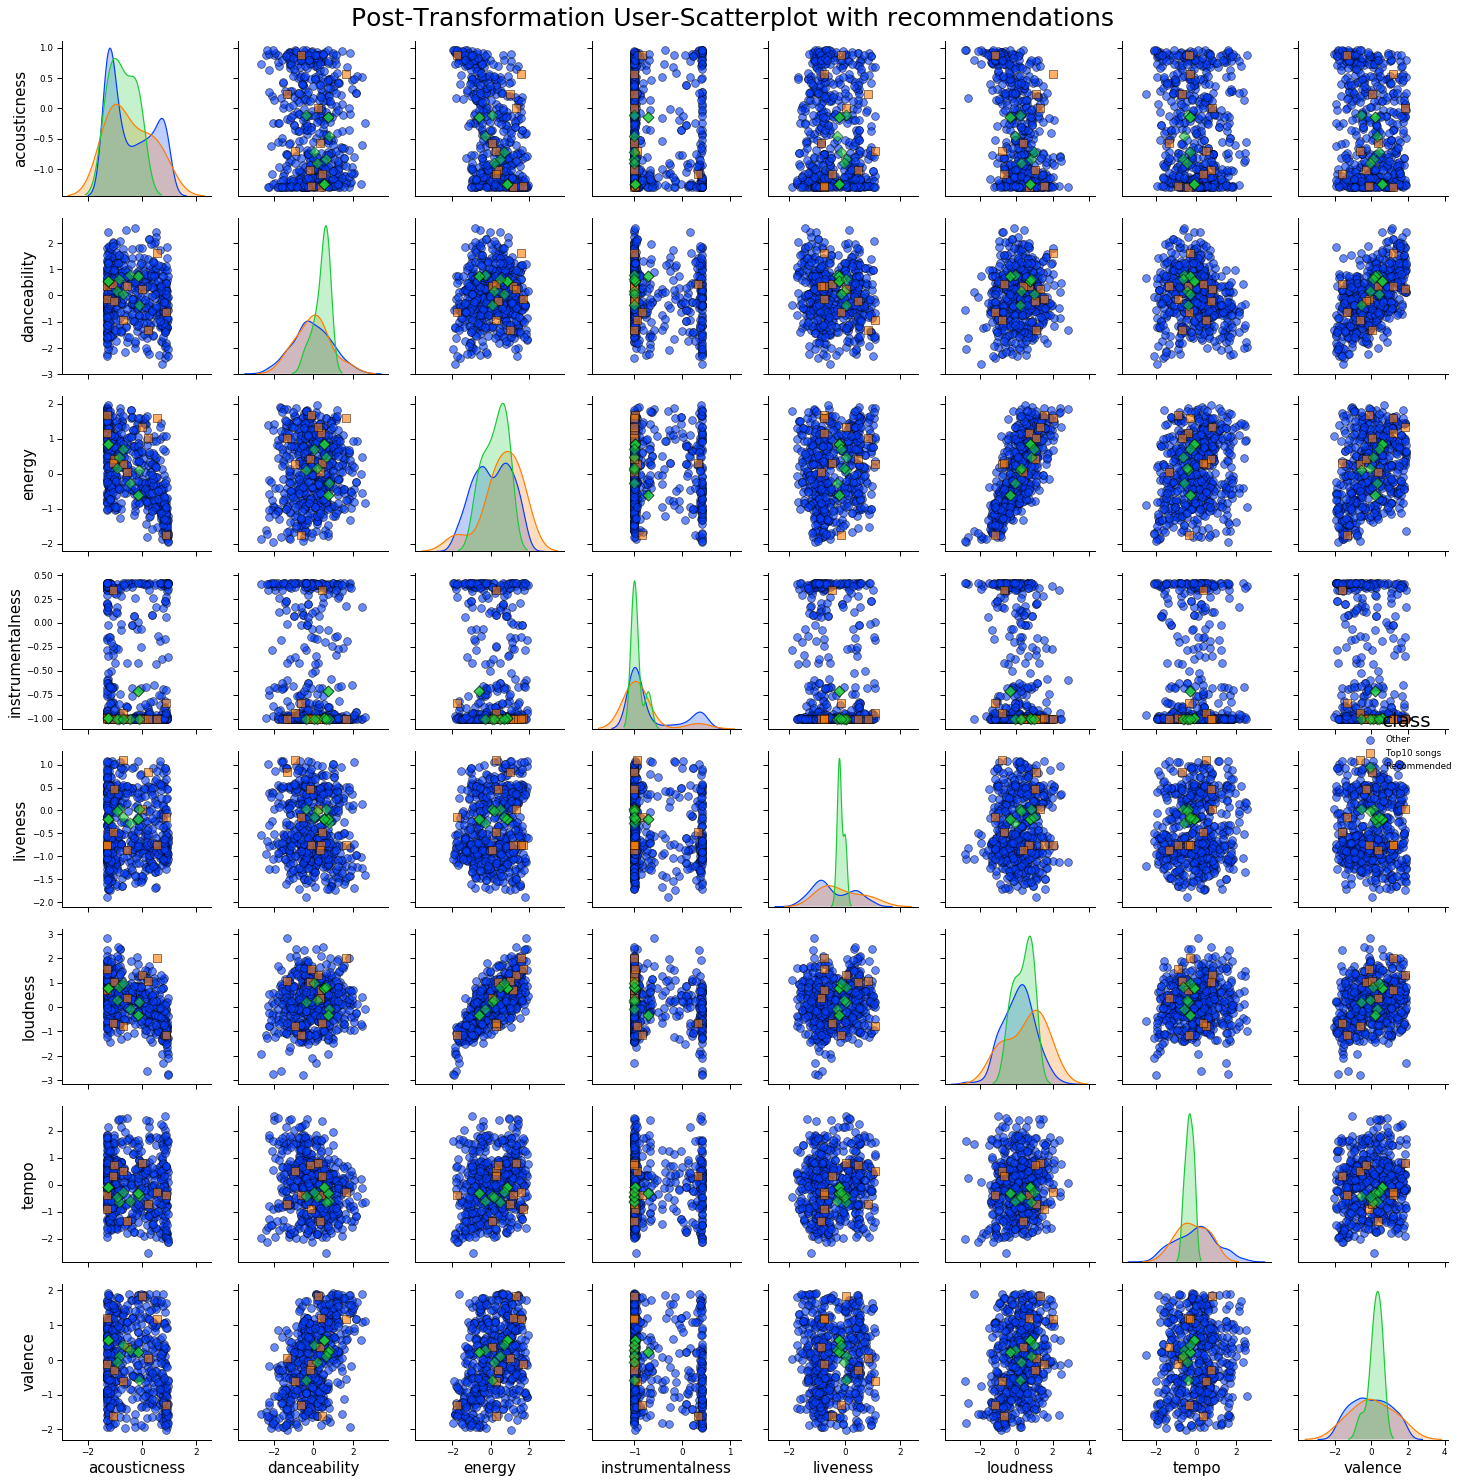

In [109]:

print(plotting.shape)
g = sns.pairplot(plotting,hue='class',markers=["o", "s", "D"],palette="bright",
                 hue_order=['Other','Top10 songs','Recommended'],
                 plot_kws = {'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, height = 4)
g.fig.set_size_inches(20,20)
#g.rcParams["axes.labelsize"] = 15
g.fig.suptitle('Post-Transformation User-Scatterplot with recommendations',y=1.02,fontsize=25)
g._legend.get_title().set_fontsize(20)
#g.fig.legend(loc='upper left')
#g.xlabel(fontsize=20)
sns.set_context("paper", rc={"axes.labelsize":15})
g.fig.tight_layout(pad=0.001)
g.fig.savefig(r'plots\user_listen_recs2.png')
g.fig.show()

## Evaluation

First 10 songs 
For given user remove all songs that he don't listen

Bars
- Blue - popular songs
- Green = liklelyhood of that song (his 10 songs)/total likelyhood
- Blue - the top10 listened songs overall (then take the songs of those he listened too)
(that song/total listens)


real value:
Listen count of that song/total_listen count

Rec:
Likelyhood of this song/tot likelyhood for all user_top10

Colab filt:
Use predicted rating for given user/all predicted counts

Then compute difference between the real and the pred 


Baseline:
top10_user - how often are they listened to general public = x
x / total listen count - then if he listens to the general public

Analysis if the baseline shows bad results - then

In [10]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts

from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis as mah

In [178]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

In [ ]:
cont.users

In [158]:
aa = trans_df.groupby(by=['ids'])['listen_count'].count()
aa.rename('o_count',inplace=True)
total_listen = aa.sum()
def mean_squared_error(real,pred):
    return np.subtract(real,pred)**2
    #return (real-pred)**2

In [159]:
def cm(song,mu,covs):
    distance =(song-mu).dot(np.linalg.inv(covs)).dot(song-mu)**0.5

    return distance
def calc_mah(songs,mu,covs):
    distances=[]
    for i in songs:
        distances.append(cm(song=i,mu=mu,covs=covs)**2)
    return distances

In [121]:
(0.1-(22/(10+12+20)))**2

0.17961451247165536

In [119]:
bounds

[3.4895391256498227,
 4.593573612056168,
 5.527422085225297,
 6.422645560241918,
 7.344121497701794,
 8.35052546775366,
 9.524458193071833,
 11.03009143030311,
 13.36156613651173]

In [160]:
quar_size=10


def create_bounds(dof=8,size=10):
    """Creates the intervals for which we will set our mah dist"""
    return [chi2.ppf(i/size,df=dof) for i in range(1,size)]


bounds = create_bounds(dof=8,size=quar_size) #split into 10 quarentiles
def check_interval(dist,bound=bounds):
    """Checks which chi2 interval the songs are in, the bounds are by default got from create_bounds"""
    for i,current_bound in enumerate(bounds):
        if dist<current_bound:
            #print(current_bound)
            #print(current_bound)
            return i
    return len(bound) #if it's bigger than all buonds
print(check_interval(dist=14))#check
check_intervals = np.vectorize(check_interval) #vectorize the function to pass the array

9


In [161]:
start= time.time()
def get_bins(user_mah_dist,user_count,public_count,bounds=bounds,quar_size=quar_size,only_mse=False):
    """Take the given percentiles from the chi-square distrbitution and returns a dict of frequency of listens
    in that percentile for users and public, also returns a summary dataframe
    -input:
        -mah_dist: the distance values for the user
        - user_count = the user listen count
        - public_count = how many times the public has listened
        - bounds : percentile bounds for chi-square
        - quar_size= the amount of quarentiles that are computed
        -only_mse: If you only want to return the mse values for users and public to save memory"""
    #public_mah = check_intervals(mah_dist_public)
    mah_values =check_intervals(user_mah_dist) #check which quarentile bin the the song is in
    
    
    #pdb.set_trace()
    user_bins= {key: 0 for key in range(0,quar_size+1)} #could be done outside if necessary
    pub_bin = {key: 0 for key in range(0,quar_size+1)}
    for index,value in enumerate(mah_values):
        #go through each element in the bins array and map that to the dict        
        if value<=quar_size:       
            user_bins[value] += user_count[index]
            pub_bin[value]+= public_count[index]
            #the bins have been created so they'll correspond too the value in mah_values, 
            #but we still want the index of that value since it matches the listen count   
    
    model_recs = 1/quar_size #this will be a constant cus the model will always recommend in this fashion
    res = pd.DataFrame({'user_bin':user_bins,
                        'public_bin':pub_bin,
                        'model_rec':model_recs})
    res['user_freq'] = res.user_bin/user_count.sum()
    #print(f'public: {public_count.sum()}')
    res['public_freq'] = (res.public_bin)/public_count.sum()
    
    res['user_SE'] = (res.user_freq-model_recs)**2
    res['public_SE'] = (res.user_freq-res.public_freq)**2 #user values are the real values that we want to mimic
    #res=rec
    res =res[0:10]
    #del(user_bins)
    #del(pub_bin)
    mse_user = res.user_SE.agg('mean')
    mse_public = res.public_SE.agg('mean')
    if only_mse:
        return mse_user,mse_public
    else:
        return res,mse_user,mse_public




end = ((time.time()-start)/60)*40000
print(end)

0.0


In [162]:
%time
start = time.time()
def lego(user,state,public_data=aa,main_dataset= trans_df,full_results=True,mahal_dist=False,only_mse=False):
    """Calculates and evaluates all results, 
    if full=True then it also returns an array of data, else just the two mse
    
    Gives the option to calc mahal distance:
    Returns the modified results that only calculates mahal
    
    - if only_mse it will only return the mse for public and user
    
    
    - if you want too see us_y- dataframe with mah distances and the individual bin results: 
        set only_mse to false"""
    
    N = len(main_dataset.loc[user,:])
    subset= main_dataset.loc[user,:]
    
    
    train,test = tts(subset,random_state=state,test_size=0.2)#(100/len(subset)))
    trainsize=len(train)
    us_mean = np.average(train[selected],axis=0,weights=train['listen_count'])
    us_covs = np.cov(train[selected],fweights= train['listen_count'],rowvar=False)

    
    columns = ['ids','title','artist','prob','listen_count']
    us_y= pd.DataFrame({'ids':test.ids,
                       'title':test.title,
                       'artist':test.artist,
                       'listen_count':test.listen_count})
    #try:
    us_y['likelihood'] = calc_normal(test[selected],us_mean,us_covs)
    #except:
     #   print(f'returned NAN value for user {user}')
      #  return np.nan,np.nan,np.nan
    
    #Divide by total number of songs for that user in test set!
    #pdb.set_trace()
    #Cover users that have 
    #If they don't match match the numbers there it should be close to the baseline
   
    #getting the public listen count for these sogns
    us_y = us_y.merge(public_data,how='left',on='ids')
    
    if mahal_dist:
        #do I want this for only top ten songs
        #will this calc the right values with the full vector- check!
        #pdb.set_trace()
        us_y['mah']= calc_mah(songs= test[selected].values,mu=us_mean,covs= us_covs)
             
              
        if only_mse:
            mse_user,mse_public =get_bins(
                user_mah_dist=us_y.mah.values,
                user_count=us_y.listen_count.values,
                public_count = us_y.o_count.values,
                only_mse=True) 
            return mse_user,mse_public
        else: #here we retrun the whole result array
            user_result,mse_user,mse_public =get_bins(
                user_mah_dist=us_y.mah.values,
                user_count=us_y.listen_count.values,
                public_count = us_y.o_count.values
                ) 
            return user_result,us_y,mse_user,mse_public
        #given this distance now you check 
    else:
        if len(subset)<10:
            us_y= us_y.sort_values(by='likelihood',ascending=False).head(5)
        else:    
            us_y= us_y.sort_values(by='likelihood',ascending=False).head(10)
        us_y.reset_index(drop=True,inplace=True)
        
        us_y['rec_percentage'] = us_y['likelihood'].values/us_y['likelihood'].values.sum()
        us_y['real'] = us_y['listen_count'].values/us_y['listen_count'].values.sum()  #either it is the total of test songs or total of subset (user)
        #us_y['Rec_SE'] = mean_squared_error(us_y['real'].values,us_y['rec_percentage'].values)
        us_y['Rec_SE'] = (us_y['real'] -us_y['rec_percentage'])**2



        

        #geting the baseline
        us_y['baseline'] = us_y['o_count']/us_y['o_count'].sum() #total_listen in test s
        us_y['base_SE'] = (us_y['real'] -us_y['baseline'])**2

        #calc mse
        mse_rec = us_y['Rec_SE'][0:7].agg('mean')
        mse_base = us_y['base_SE'][0:7].agg('mean')
    
        if full_results:
            return us_y,mse_rec,mse_base
        else:
            #print(mse_rec)
            return mse_rec,mse_base


Wall time: 0 ns


### New evaluation method

In [163]:
#antal_users = 2


def saving_mah(stuff,name,part):
    """save the 2 results"""
    with open(f"{name}_mse_mah_overfit_{int(part)}.txt","wb") as fil:
        pickle.dump(stuff,fil)



def get_mah_results(antal_users,state,only_mse=False,offset=0,):
    """This function runs the big computation loop that calculates all results,several sub functions are called inside
    
    -Offset- if you saved previous results and want to start from a certain index of users
    - State is the random state in which train and test set is split, can be used for cross validation
    
    """
    start=time.time()
    users = []
    public=[]
    results = {key: {'data':None,'bins':None} for key in cont.users[offset:offset+antal_users]} #3509
    if only_mse:
        for i,k in enumerate(results.keys()):
            
            user_mse,public_mse = lego(k,mahal_dist=True,only_mse=True,state=state)
            users.append(user_mse)
            public.append(public_mse)
            if (i%5000 ==0) and (i !=0):
                print(f'At {i} users, time: {round((time.time()-start)/60,3)} min')
                saving_mah(users,'model',i/1000)
                saving_mah(public,'public',i/1000)
        
        end = (((time.time()-start)/60)/antal_users)
        end_all =round(end*40000,3)
        print(f'Time: {round(end,3)} min \nEstimated time for all users: {end_all} min')
        return users,public
        
    else:
        for i,k in enumerate(results.keys()):
            #print(k)
            results[k]['bins'],results[k]['data'],user_mse,public_mse = lego(k,state,mahal_dist=True)
            users.append(user_mse)
            public.append(public_mse)
        
        end = (((time.time()-start)/60)/antal_users)*40000
        print(end)
        return results,users,public
    

In [164]:
antal_users=100
offset=0
model1,public1 = get_mah_results(antal_users=antal_users,offset=offset,state=5,only_mse=True)

Time: 0.001 min 
Estimated time for all users: 21.314 min


In [18]:
def get_data(name):
    if name==1:
        with open("model_mse_mah_overfit_30.txt", "rb") as fp:   # Unpickling
            model1 = pickle.load(fp)

        with open("public_mse_mah_overfit_30.txt", "rb") as fp:
            public1 = pickle.load(fp)
    else:
        with open("model_mse_mah2_35.txt", "rb") as fp:   # Unpickling
            model1 = pickle.load(fp)

        with open("public_mse_mah2_35.txt", "rb") as fp:
            public1 = pickle.load(fp)
    return model1,public1
model1,public1 = get_data(1)
print(len(model1),len(public1))

30001 30001


In [165]:
%%time
song_count =[]
count =[]
for i,us in enumerate(cont.users[0:len(model1)]):
    obj = trans_df.loc[us,'listen_count']    
    count.append(obj.sum())
    song_count.append(len(obj))
count,song_count = np.array(count),np.array(song_count)

Wall time: 36.4 ms


In [167]:

new_results =pd.DataFrame({'user':cont.users[:len(model1)],
                          'mse_model':model1,
                          'mse_public':public1,
                           'Listens':(count*0.2).astype('int'),
                           'songs':(song_count*0.2).astype('int'),
                            'Difference': np.subtract(public1,model1)
                          })
rang=100#len(model1)
mse_all_model= new_results.mse_model[0:rang].agg('mean')
mse_all_public = new_results.mse_public[0:rang].agg('mean')

over = round(((mse_all_public-mse_all_model)/np.average([mse_all_model,mse_all_public]))*100,3)
print(f'Overall performance: \n Model: {mse_all_model} \n Baseline: {mse_all_public}\n Model was {over}%')
print(mse_all_model-mse_all_public)
new_results.head(rang)

Overall performance: 
 Model: 0.009276487981970396 
 Baseline: 0.003715146021412344
 Model was -85.614%
0.0055613419605580515


user  mse_model  mse_public  Listens  \
0   6d625c6557df84b60d90426c0116138b617b9449   0.011788    0.002707      556   
1   fbee1c8ce1a346fa07d2ef648cec81117438b91f   0.005689    0.002794      196   
2   4e11f45d732f4861772b2906f81a7d384552ad12   0.005497    0.002831      178   
3   24b98f8ab023f6e7a1c37c7729c623f7b821eb95   0.008115    0.000952      182   
4   1aa4fd215aadb160965110ed8a829745cde319eb   0.005011    0.001719      227   
..                                       ...        ...         ...      ...   
95  fcf133f52bc35054b3956801c5307ddc44d5580d   0.006566    0.001281      123   
96  1c47405cb493c053e5dce0c8b8524bd77b39af55   0.009463    0.000259      146   
97  d44a5a0dcb0d06a91c85bfe51d9c337a8a4ce42b   0.022570    0.010168      127   
98  3918f8a3ec7232cc48f6f50d709bbbeab2c61c94   0.006758    0.000620       74   
99  7a7dc4aec09a72c616d04da1d6944cd392ee68de   0.017627    0.003694      143   

    songs  Difference  
0     113   -0.009082  
1     106   -0.002895  
2      96   -0.002666  
3      89   -0.007163  
4      88   -0.003292  
..    ...         ...  
95     46   -0.005284  
96     46   -0.009204  
97     46   -0.012402  
98     46   -0.006138  
99     46   -0.013933  

[100 rows x 6 columns]

In [74]:
a= new_results.head(10).copy()
b = a.Difference
(np.mean(b)-0) / (np.std(b)/np.sqrt(15))

0.3192357523697032

In [ ]:
zoomed_results = pd.DataFrame(new_results.head(10).copy())
zoomed_results.mse_model=zoomed_results.mse_model.round(5)
zoomed_results.mse_public=zoomed_results.mse_public.round(5)
zoomed_results.Difference=zoomed_results.Difference.round(4)
zoomed_results.head()
#zoomed_results.to_csv('zoomed_results.csv')

In [320]:
zoomed_results.Difference.agg('mean')

-0.00062

In [21]:
for i in range(0,35001,5000):
    mse_all_model= new_results.mse_model[i-5000:i].agg('mean')
    mse_all_public = new_results.mse_public[i-5000:i].agg('mean')
    print(f'MSE Model at {i}: {round(mse_all_model,4)}')
    print(f'MSE Public at {i}: {round(mse_all_public,4)}')
    print(f'diff {round(mse_all_model-mse_all_public,4)}\n\n')

MSE Model at 0: nan
MSE Public at 0: nan
diff nan


MSE Model at 5000: 0.0145
MSE Public at 5000: 0.0098
diff 0.0047


MSE Model at 10000: 0.0276
MSE Public at 10000: 0.0131
diff 0.0145


MSE Model at 15000: 0.0389
MSE Public at 15000: 0.0131
diff 0.0258


MSE Model at 20000: 0.0493
MSE Public at 20000: 0.0117
diff 0.0375


MSE Model at 25000: 0.0603
MSE Public at 25000: 0.0098
diff 0.0505


MSE Model at 30000: 0.0699
MSE Public at 30000: 0.0067
diff 0.0633


MSE Model at 35000: 0.09
MSE Public at 35000: 0.0
diff 0.09




## Plotting the error for increasing number of users

In [223]:
new_results[3500:3510]

user  mse_model  mse_public  \
3500  64b57383ca78ee2ab805dfa8a2d390fc4d149745   0.014516    0.005042   
3501  e96bd858adf242d2109f4f17511374118f770aad   0.029094    0.000359   
3502  4abbb6cf90e59bbbcf87b1f0cf4e3bc28ce4a1ea   0.024181    0.002416   
3503  b42ea9fc55cfa53f743241b67cca4f9a957953f2   0.023384    0.001554   
3504  0b74d699e4e61fa4e10684f8fb5714e5a0c5ee44   0.021795    0.003658   
3505  bdf528f3bc4595cce98005cbadd0a40578d3fcfe   0.021500    0.030639   
3506  7a2bc35ea24ba2c312be5ad8734d9712834ef65f   0.033477    0.002128   
3507  359638ac51c0103ba4b47f3419e46b8517a54213   0.005948    0.001503   
3508  91f1e8f354499e08f1e3964f293eb70dfee55558   0.012198    0.008202   
3509  ec56bda8fbfe9105853946c0ec2a967e36f2cab5   0.007216    0.003379   

      Listens  songs  
3500       33     13  
3501       24     13  
3502       53     13  
3503       24     13  
3504       24     13  
3505       23     13  
3506       55     13  
3507       22     13  
3508       15     13  
3509       16     13

In [23]:
antal_users=30000
m1=[]
m2=[]
for i in range(0,antal_users):
    m1.append(new_results.mse_model[:i].agg('mean'))
    m2.append(new_results.mse_public[:i].agg('mean'))



Text(0,0.5,'Number of songs')

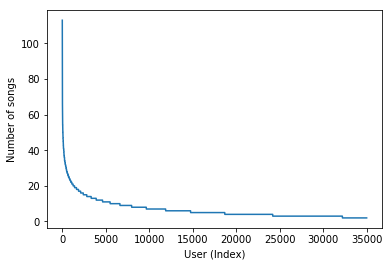

In [144]:
plt.plot(new_results.songs)
plt.xlabel('User (Index)')
plt.ylabel('Number of songs')

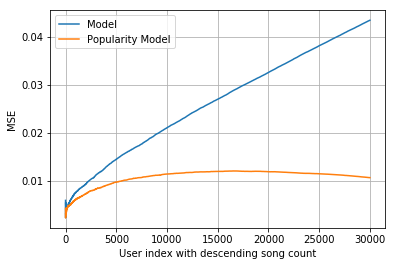

In [25]:
plt.plot(m1,label='Model')
plt.plot(m2,label='Popularity Model')
plt.xlabel('User index with descending song count')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.savefig(r'plots\MSE_users3.png')
plt.show()

Text(0.5,0,'Number of unique songs')

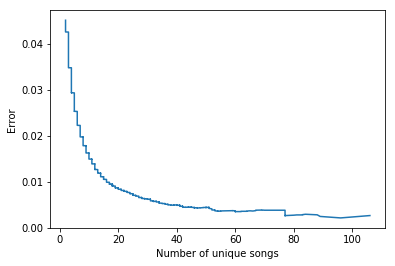

In [109]:
plt.plot(new_results.songs[:-1],m1)
plt.ylabel('Error')
plt.xlabel('Number of unique songs')

In [300]:
from plotly.offline import plot
import plotly.express as px
fig = px.scatter_3d(x=new_results.songs[:],z=m1,y=new_results.Listens[:],color=m1,width=800, height=800)
fig.layout = go.Layout(
    scene = dict(
    xaxis = dict(
        title='Unique songs'),
    yaxis = dict(
        title='Listens'),
    zaxis = dict(
        title='Error'),))
plot(fig)

'temp-plot.html'

### Get one user

In [90]:
offset=4
results,model2,public2 = get_mah_results(antal_users=1,offset=offset,state=10,only_mse=False)

31.259536743164062


In [91]:
first = list(results.keys())[0]
print(f'User: {first} \nPublic: {public2} \nModel: {model2}')
results[first]['bins']#[0:10]

User: 1aa4fd215aadb160965110ed8a829745cde319eb 
Public: [0.0037098913490095477] 
Model: [0.002323662496672877]


user_bin  public_bin  model_rec  user_freq  public_freq   user_SE  \
0        12         887        0.1   0.054299     0.048430  0.002089   
1        36        1255        0.1   0.162896     0.068523  0.003956   
2        12         825        0.1   0.054299     0.045045  0.002089   
3        11         617        0.1   0.049774     0.033688  0.002523   
4        20        4106        0.1   0.090498     0.224188  0.000090   
5        19        1768        0.1   0.085973     0.096533  0.000197   
6        34        3169        0.1   0.153846     0.173028  0.002899   
7        11         470        0.1   0.049774     0.025662  0.002523   
8        26         815        0.1   0.117647     0.044499  0.000311   
9        40        4403        0.1   0.180995     0.240404  0.006560   

   public_SE  
0   0.000034  
1   0.008906  
2   0.000086  
3   0.000259  
4   0.017873  
5   0.000112  
6   0.000368  
7   0.000581  
8   0.005351  
9   0.003529

In [50]:
binbin.user_bin[0:8].agg('mean')

21.875

In [44]:
binbin= results[first]['bins'].copy()
binbin = binbin.round(5)
binbin.to_csv('4bins.csv')

In [70]:
binbin.public_SE.agg('mean')

0.002072

### Cross validation for the top 10 users

In [133]:
antal=10
offset=0
leg=500
models =np.zeros((leg,10))
publics= np.zeros((leg,10))
#publics = np.zeros((00,10))
for k in range(0,leg):
    models[k],publics[k] = get_mah_results(antal_users=antal,offset=offset,state=(k+60),only_mse=True)

avg1=np.zeros((10))
avg2=np.zeros((10))
#avg2=np.zeros((10))
for a in range(0,leg):
    avg1[a] =models[:,a].mean()
    avg2[a] =publics[:,a].mean()

Time: 0.0 min 
Estimated time for all users: 16.022 min
Time: 0.0 min 
Estimated time for all users: 15.226 min
Time: 0.0 min 
Estimated time for all users: 14.694 min
Time: 0.0 min 
Estimated time for all users: 15.359 min
Time: 0.0 min 
Estimated time for all users: 15.159 min
Time: 0.0 min 
Estimated time for all users: 14.73 min
Time: 0.0 min 
Estimated time for all users: 15.492 min
Time: 0.0 min 
Estimated time for all users: 17.368 min
Time: 0.0 min 
Estimated time for all users: 15.348 min
Time: 0.0 min 
Estimated time for all users: 15.593 min
Time: 0.0 min 
Estimated time for all users: 15.781 min
Time: 0.0 min 
Estimated time for all users: 15.383 min
Time: 0.0 min 
Estimated time for all users: 15.534 min
Time: 0.0 min 
Estimated time for all users: 16.823 min
Time: 0.0 min 
Estimated time for all users: 16.555 min
Time: 0.0 min 
Estimated time for all users: 16.956 min
Time: 0.0 min 
Estimated time for all users: 15.981 min
Time: 0.0 min 
Estimated time for all users: 16.8

IndexError: index 10 is out of bounds for axis 1 with size 10

In [126]:
avg1

array([0.00449571, 0.00154687, 0.001531  , 0.00198596, 0.00197325,
       0.00178425, 0.00229218, 0.00202148, 0.0019646 , 0.00190956])

In [127]:
avg2

array([0.00394955, 0.00158122, 0.00287337, 0.00105469, 0.00308194,
       0.00118002, 0.00289263, 0.00262762, 0.00140249, 0.00140856])

In [134]:
new_results_kfold =pd.DataFrame({'user':cont.users[:len(avg1)],
                          'mse_model':avg1,
                          'mse_public':avg2,
                           'Listens':(count[0:10]*0.2).astype('int'),
                           'songs':(song_count[0:10]*0.2).astype('int'),
                            'Difference': np.subtract(avg2,avg1)
                          })

mse_all_model_k= new_results_kfold.mse_model.agg('mean')
mse_all_public_k = new_results_kfold.mse_public.agg('mean')

over_k = ((mse_all_public_k-mse_all_model_k)/np.mean([mse_all_model_k,mse_all_public_k]))*100
print(f'Overall performance: \n Model: {mse_all_model_k} \n Baseline: {mse_all_public_k}\n Model was {over_k}%')
#print(mse_all_model-mse_all_public)
new_results_kfold.head(10)

Overall performance: 
 Model: 0.0025087306013332413 
 Baseline: 0.0024223749835373828
 Model was -3.5024850435492834%


user  mse_model  mse_public  Listens  \
0  6d625c6557df84b60d90426c0116138b617b9449   0.006822    0.005680      556   
1  fbee1c8ce1a346fa07d2ef648cec81117438b91f   0.001498    0.001719      196   
2  4e11f45d732f4861772b2906f81a7d384552ad12   0.002134    0.002553      178   
3  24b98f8ab023f6e7a1c37c7729c623f7b821eb95   0.002096    0.001456      182   
4  1aa4fd215aadb160965110ed8a829745cde319eb   0.002205    0.002812      227   
5  15eeb36ae1c62d60de9fdeea0d121eb7d08713be   0.001909    0.001165      165   
6  6a9cf03dfb2fc82f5b3b043c9c3fdbab997fd54d   0.002386    0.002666      264   
7  b04e41133dd3d30a5631cc8589a1eadd48a8bd53   0.002317    0.002448      178   
8  ce5c912bb8044f23fc0fc31bd986b8d0a7303db5   0.001910    0.001793      129   
9  a5662573fc213168a37ee24f32bc2f9cd96582cc   0.001810    0.001932      116   

   songs  Difference  
0    113   -0.001143  
1    106    0.000221  
2     96    0.000419  
3     89   -0.000640  
4     88    0.000607  
5     84   -0.000744  
6     83    0.000280  
7     83    0.000131  
8     81   -0.000117  
9     80    0.000122

In [81]:
a =models.reshape(100,1)
b = publics.reshape(100,1)
from scipy import stats
stats.ttest_ind(b,a)

Ttest_indResult(statistic=array([0.50883681]), pvalue=array([0.61143315]))

In [40]:
new_results_kfold.Difference.mean()

0.00014400000000000003

In [38]:
new_results_kfold.mse_model=new_results_kfold.mse_model.round(5)
new_results_kfold.mse_public=new_results_kfold.mse_public.round(5)
new_results_kfold.Difference=new_results_kfold.Difference.round(5)
new_results_kfold.to_csv('overall_topten_kfold.csv')

### This shows that our model have a very difficult time predicting for users with few songs

# Problem if the user accounts for a large portion of the listen count

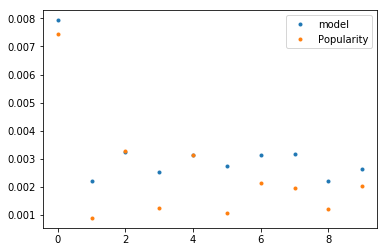

In [47]:
plt.plot(new_results_kfold.mse_model.values[:],label='model',linestyle='none',marker='.')
plt.plot(new_results_kfold.mse_public.values[:],label='Popularity',linestyle='none',marker='.')
plt.legend()

(array([2.7544e+04, 4.3950e+03, 1.6270e+03, 7.3800e+02, 3.8300e+02,
        1.4900e+02, 9.3000e+01, 4.0000e+01, 2.7000e+01, 5.0000e+00]),
 array([0.        , 0.01361231, 0.02722461, 0.04083692, 0.05444922,
        0.06806153, 0.08167383, 0.09528614, 0.10889844, 0.12251075,
        0.13612305]),
 <a list of 10 Patch objects>)

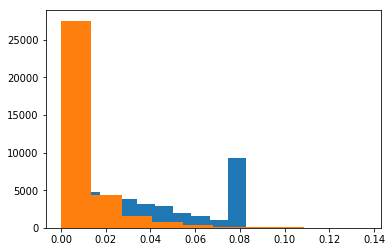

In [20]:
plt.hist(new_results.mse_model.values)
plt.hist(new_results.mse_public.values)

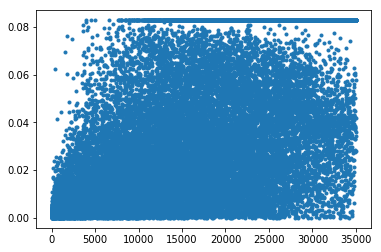

In [136]:
plt.plot(abs(new_results.mse_model.values[0:]-new_results.mse_public.values[:]),
         linestyle='none',marker='.')

### Old evaluation method

In [328]:
flag = True # Just set if you want the dataframe or the dict
start=time.time()
def saving(res,part):
    pickle_out = open(f"results_mod_{part}.pickle","wb")
    pickle.dump(res, pickle_out)
    pickle_out.close()
results = {key: {'data':None,'mse_rec':None,'mse_base':None} for key in cont.users[:2]} #3509

#overall_res2['user'] =cont.users[0:ran]
for i,k in enumerate(results.keys()):
    if i%5000 ==0:
        if i !=0: #and flag:
            saving(results,int(i/1000))
        #else:
            #overall_res.to_csv('overall_results_mod.csv')
        print(f'{i} users at time: {round((time.time()-start)/60,3)} min')
    results[k]['data'],results[k]['mse_rec'],results[k]['mse_base'] = lego(k) #Just uncomment this is you want to get the full data to your dicts

end = ((time.time()-start)/60)*40000
print(end)

0 users at time: 0.0 min
30.592918395996094


In [332]:
results[example_user]['data'].head()

ids                  title         artist  \
0  spotify:track:6Ng7aSXUQpu0bUD02e7bLd  That Was Just A Dream       Cut Copy   
1  spotify:track:1STAWoWHYJh2UVUx41pYMD                  Lost!       Coldplay   
2  spotify:track:5YahO7aySL2lyj6DW2tS9q             One I Love       Coldplay   
3  spotify:track:2opP9I9qyAQZF68ecuHIne                Charmer  Kings Of Leon   
4  spotify:track:0aUATjSSGs7kJ7DK3J8x99     Sobredosis De T.V.    Soda Stereo   

   listen_count  likelihood  o_count  rec_percentage      real    Rec_SE  \
0             1    0.004364      468        0.233576  0.058824  0.030538   
1             1    0.003221      559        0.172402  0.058824  0.012900   
2             3    0.002441      363        0.130622  0.176471  0.002102   
3             3    0.001625      182        0.086996  0.176471  0.008006   
4             1    0.001429      137        0.076495  0.058824  0.000312   

   baseline   base_SE  
0  0.135143  0.005825  
1  0.161421  0.010526  
2  0.104822  0.005133  
3  0.052556  0.015355  
4  0.039561  0.000371

1. Create an empty datframe with 5 rows (each rep one bin) and following columns:
    - Model Perc (will be constant)
    - User count  (how many listens the user has in
    this ring)
    - Public count (how many total counts in this ring)
    - user_per (how many percentages of user_listen count is in this ring)
    - public_per (how many per of public_listen is here)
1. Find which interval/bin the song is in and multiply that by the listen count (low bins are more center)
2. Get the general listen count of that song
3. Divide them by tot_user and tot_general in test set

In [102]:
bounds

[3.4895391256498227,
 4.593573612056168,
 5.527422085225297,
 6.422645560241918,
 7.344121497701794,
 8.35052546775366,
 9.524458193071833,
 11.03009143030311,
 13.36156613651173]

In [379]:
start= time.time()
def get_bins(user_mah_dist,user_count,public_count,bounds=bounds,quar_size=quar_size,only_mse=False,bars=8):
    """Take the given percentiles from the chi-square distrbitution and returns a dict of frequency of listens
    in that percentile for users and public, also returns a summary dataframe
    -input:
        -mah_dist: the distance values for the user
        - user_count = the user listen count
        - public_count = how many times the public has listened
        - bounds : percentile bounds for chi-square
        - quar_size= the amount of quarentiles that are computed
        -only_mse: If you only want to return the mse values for users and public to save memory
        -bars = How many of the bins should be counted when calculating MSE, default is 8"""
    #public_mah = check_intervals(mah_dist_public)
    mah_values =check_intervals(user_mah_dist) #check which quarentile bin the the song is in
    
    bins= {key: 0 for key in range(0,quar_size+1)} #could be done outside if necessary
    pub_bin = {key: 0 for key in range(0,quar_size+1)}
    for index,value in enumerate(mah_values):
        #go through each element in the bins array and map that to the dict        
        if value<=quar_size:       
            bins[value] += user_count[index]
            pub_bin[value]+= public_count[index]
            #the bins have been created so they'll correspond too the value in mah_values, 
            #but we still want the index of that value since it matches the listen count   
    
    model_recs = 1/quar_size #this will be a constant cus the model will always recommend in this fashion
    res = pd.DataFrame({'user_bin':user_bin,
                        'public_bin':pub_bin,
                        'model_rec':model_recs})
    res['user_freq'] = res.user_bin/user_count.sum()
    res['public_freq'] = res.user_bin/public_count.sum()
    res['user_SE'] = (res.user_freq-model_recs)**2
    res['public_SE'] = (res.public_freq-res.user_freq)**2 #user values are the real values that we want to mimic
    
    mse_user = res.loc[:bars,'user_SE.loc'].agg('mean') #bars= how many of the bins should be counted
    mse_public = res.loc[:bars,'public_SE.loc'].agg('mean')
    if only_mse:
        return mse_user,mse_public
    else:
        return bins,pub_bin,res,mse_user,mse_public


user_bin, public_bin,res_bins,mse_user,mse_public =get_bins(
    user_mah_dist=results[example_user]['data'].mah.values,
        user_count=results[example_user]['data'].listen_count.values,
        public_count = results[example_user]['data'].o_count.values)


end = ((time.time()-start)/60)*40000
print(end)

AttributeError: 'DataFrame' object has no attribute 'mah'

In [ ]:
antal_users=1

res,model2,public2 = get_mah_results(antal_users=antal_users,offset=0,state=2,only_mse=True)



user_bin, public_bin,res_bins,mse_user,mse_public =get_bins(
    user_mah_dist=results[example_user]['data'].mah.values,
        user_count=results[example_user]['data'].listen_count.values,
        public_count = results[example_user]['data'].o_count.values)

In [22]:
example_user= 'fbee1c8ce1a346fa07d2ef648cec81117438b91f'

In [24]:
results[example_user]['data']

ids                        title  \
0  spotify:track:3cK62RyLCP5oMLdEeQuHPi                     Timeless   
1  spotify:track:5XE8c07vbpQBUriwybOHtd  Have You Ever Seen The Rain   
2  spotify:track:7fgjeQqpa882HHMxn0iTw0           Dance with a Devil   
3  spotify:track:2gX6c5zg8gioR1CsX9TMFB                     EMOTIONS   
4  spotify:track:1STAWoWHYJh2UVUx41pYMD                        Lost!   
5  spotify:track:1LWjmT4ByPgkwWPkIWoy6Q            Hard Headed Woman   
6  spotify:track:3lZkuYrlxctoSkxRBrGHKS        Rockin' Rollin' Stone   
7  spotify:track:0sSdFMuYrn3N9moumV466B         He Can Only Hold Her   
8  spotify:track:0neva1N08tpWLLVrrXZm2Y         Communication Part 3   
9  spotify:track:5rXDTihGQ3TkYE3pmraAmH                 ROCKSTAR 101   

                         artist  listen_count  likelihood  rec_percentage  \
0            Ron Van Den Beuken             1    0.003372        0.233464   
1  Creedence Clearwater Revival             2    0.002047        0.141702   
2                   Filo + Peri             1    0.001673        0.115792   
3                  Mariah Carey             1    0.001467        0.101569   
4                      Coldplay             1    0.001195        0.082749   
5                   Cat Stevens             1    0.001132        0.078360   
6                    Andy Starr             1    0.000970        0.067152   
7                 Amy Winehouse             3    0.000919        0.063596   
8              Armin van Buuren             1    0.000838        0.057993   
9               Rihanna / Slash             4    0.000832        0.057622   

     real    Rec_SE  o_count  baseline   base_SE  
0  0.0625  0.029229      316  0.091860  0.000862  
1  0.1250  0.000279      791  0.229942  0.011013  
2  0.0625  0.002840      239  0.069477  0.000049  
3  0.0625  0.001526      110  0.031977  0.000932  
4  0.0625  0.000410      559  0.162500  0.010000  
5  0.0625  0.000252      148  0.043023  0.000379  
6  0.0625  0.000022      317  0.092151  0.000879  
7  0.1875  0.015352      395  0.114826  0.005282  
8  0.0625  0.000020       74  0.021512  0.001680  
9  0.2500  0.037009      491  0.142733  0.011506

In [28]:
overall_res = pd.DataFrame(columns=['mse_rec','mse_base'])
start=time.time()
ran=10001#35001
overall_res['user'] =cont.users[0:ran]

for i,k in enumerate(cont.users[:ran]):
    if i%5000==0:
        print(f'saving {i} users at time {round((time.time()-start)/60,3)}')
        overall_res.to_csv('overall_mod_results.csv')
    overall_res.loc[i,'mse_rec'],overall_res.loc[i,'mse_base']=lego(k,full_results=False)
print(time.time()-start)
overall_res.head()

saving 0 users at time 0.0
saving 5000 users at time 1.79
saving 10000 users at time 3.422
205.48809480667114


mse_rec    mse_base                                      user
0    0.017057   0.0456542  6d625c6557df84b60d90426c0116138b617b9449
1  0.00869387  0.00425816  fbee1c8ce1a346fa07d2ef648cec81117438b91f
2  0.00486148  0.00744528  4e11f45d732f4861772b2906f81a7d384552ad12
3  0.00743491   0.0023908  24b98f8ab023f6e7a1c37c7729c623f7b821eb95
4  0.00750805   0.0146166  1aa4fd215aadb160965110ed8a829745cde319eb

In [ ]:
plt.hist(overall_res['mse_base'])

In [285]:
rr = pd.read_csv('overall_mod_results.csv',index_col=0)
rr.head()

mse_rec  mse_base                                      user
0  0.017057  0.045654  6d625c6557df84b60d90426c0116138b617b9449
1  0.008694  0.004258  fbee1c8ce1a346fa07d2ef648cec81117438b91f
2  0.004861  0.007445  4e11f45d732f4861772b2906f81a7d384552ad12
3  0.007435  0.002391  24b98f8ab023f6e7a1c37c7729c623f7b821eb95
4  0.007508  0.014617  1aa4fd215aadb160965110ed8a829745cde319eb

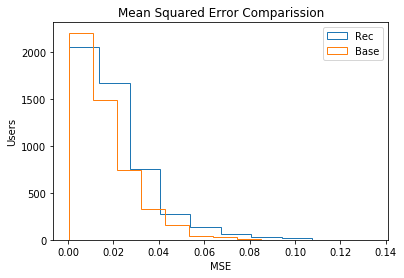

In [288]:
x1= rr.loc[0:5000,'mse_rec'].values
x2 = rr.loc[0:5000,'mse_base'].values
plt.hist(x1,histtype='step',label='Rec')
plt.hist(x2,histtype='step',label='Base')
plt.xlabel('MSE')
plt.ylabel('Users')
plt.title('Mean Squared Error Comparission')
plt.savefig(r'plots\mse_old_evaluation.png')
plt.legend()

In [51]:
overall_res.to_csv('overall_results.csv')

In [29]:
mse_base =overall_res['mse_base'].sum()/len(overall_res)
mse_rec =overall_res['mse_rec'].sum()/len(overall_res)

In [30]:
print(mse_base)
print(mse_rec)

0.017785550263930142
0.03098432224563991


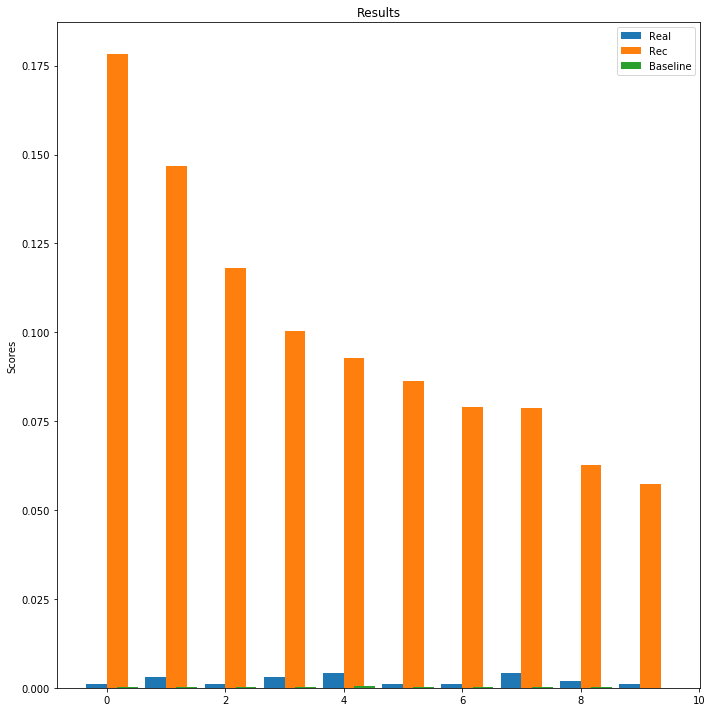

In [354]:
width = 0.35  # the width

fig, ax = plt.subplots(figsize=(10,10))
title= us_y.title 

x = np.arange(len(title))  # the label locations

rects1 = ax.bar(x-width,us_y.real, width=0.35, label='Real',align='edge')
rects2 = ax.bar(x,us_y.rec_percentage, width=0.35,label='Rec',align='edge')
rects3 = ax.bar(x+width,us_y.baseline, width=0.35, label='Baseline',align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Results')
#ax.set_xticks(x)
#ax.set_xticklabels(title)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

In [344]:

%time
start = time.time()
example_user= 'fbee1c8ce1a346fa07d2ef648cec81117438b91f'


N = len(trans_df.loc[example_user,:])
subset = trans_df.loc[example_user,:]


train,test = tts(subset,random_state=5,test_size=0.2)#(100/len(subset)))
us_mean = np.average(train[selected],axis=0,weights=train['listen_count'])
us_covs = np.cov(train[selected],fweights= train['listen_count'],rowvar=False)


columns = ['ids','title','artist','prob','listen_count']
us_y= pd.DataFrame({'ids':test.ids,
                   'title':test.title,
                   'artist':test.artist,
                   'listen_count':test.listen_count})

us_y['likelihood'] = calc_normal(test[selected],us_mean,us_covs)
us_y= us_y.sort_values(by='likelihood',ascending=False).head(10)
us_y.reset_index(drop=True,inplace=True)

us_y['rec_percentage'] = us_y['likelihood'].values/us_y['likelihood'].values.sum()
us_y['real'] = us_y['listen_count'].values/subset['listen_count'].values.sum()  #either it is the total of test songs or total of subset (user)
#us_y['Rec_SE'] = mean_squared_error(us_y['real'].values,us_y['rec_percentage'].values)
us_y['Rec_SE'] = (us_y['real'] -us_y['rec_percentage'])**2



#getting the public listen count for these sogns
us_y = us_y.merge(aa,how='left',on='ids')



#us_ids = test.ids.values
#us_songs = trans_df.loc[trans_df['ids'].isin(us_ids)]
#aa = us_songs.groupby(by='ids',as_index=False)['listen_count'].count()
#aa.rename(columns={'listen_count':'public_count'},inplace=True)
#us_y = us_y.merge(aa,how='inner',on='ids')

mse_rec = us_y['Rec_SE'].agg('mean')

#us_y['rec_percentage'] = us_y['likelihood']/us_y['likelihood'].sum()
us_y['baseline'] = us_y['o_count']/total_listen
us_y['base_SE'] = (us_y['real'] -us_y['baseline'])**2
mse_base = us_y['base_SE'].agg('mean')

#us_top10 = us_y.sort_values(by='likelihood',ascending=False).head(10)


#us_songs = trans_df.loc[example_user,:] #.drop_duplicates(subset=['ids'], keep='first')
#songs.reset_index(drop=True,inplace=True)
print(((time.time()-start)* 40000)/60)
print(f'MSE Pred {mse_rec}')
print(f'MSE base {mse_base}')
us_y.head(10)

Wall time: 0 ns
8.900165557861328
MSE Pred 0.010885097832388174
MSE base 5.117160005519411e-06


ids                            title  \
0  spotify:track:3F18I7LhWKxlf1PytSoTBH            Welcome To Heartbreak   
1  spotify:track:5FNDpQSkgFiRdUKGfagIRJ                 Stronger Than Me   
2  spotify:track:01dzGqoWcX0i0OxxqtuOL9          Letter From An Occupant   
3  spotify:track:16jdwiFgmP6rrgn34DksCe         Love The Way You Love Me   
4  spotify:track:3jmqb9d6QW8hQHxAgI5u2X  The Ballad of Michael Valentine   
5  spotify:track:3UQmoVQJqBYauTZLVPs3uo                        Luxurious   
6  spotify:track:2E4dFwZkGniM1R8LmKPeZV                         Teenager   
7  spotify:track:28rNyM2CKtOb4PYmsulQhF                       Knocked Up   
8  spotify:track:4gNNCbZFH3ENjPhtvuXWI9                          Believe   
9  spotify:track:4qz8PpznLcX5AtoUusIiAh                  A Girl Like You   

                     artist  listen_count  likelihood  rec_percentage  \
0     Kanye West / Kid Cudi             1    0.002695        0.178267   
1             Amy Winehouse             3    0.002220        0.146833   
2     The New Pornographers             1    0.001784        0.117994   
3        The Pussycat Dolls             3    0.001516        0.100266   
4               The Killers             4    0.001401        0.092681   
5              Gwen Stefani             1    0.001305        0.086343   
6            Camera Obscura             1    0.001193        0.078946   
7             Kings Of Leon             4    0.001191        0.078767   
8  The All-American Rejects             2    0.000948        0.062700   
9           The Smithereens             1    0.000865        0.057203   

       real    Rec_SE  o_count  baseline       base_SE  
0  0.001016  0.031418      152  0.000113  8.161754e-07  
1  0.003049  0.020674      285  0.000212  8.049779e-06  
2  0.001016  0.013684      136  0.000101  8.377772e-07  
3  0.003049  0.009451      281  0.000209  8.066637e-06  
4  0.004065  0.007853      585  0.000434  1.318250e-05  
5  0.001016  0.007281      122  0.000091  8.569103e-07  
6  0.001016  0.006073      289  0.000215  6.427605e-07  
7  0.004065  0.005580      435  0.000323  1.400348e-05  
8  0.002033  0.003681      114  0.000085  3.794289e-06  
9  0.001016  0.003157       76  0.000056  9.212971e-07

In [18]:
pickle_in = open("results_5.0.pickle","rb")
results = pickle.load(pickle_in)

In [ ]:
results['6d625c6557df84b60d90426c0116138b617b9449'].keys()

In [ ]:
overall_res = pd.DataFrame({'user':None,
                           'rec_mse':None,
                            'base_mse':None})


### Evaluation method 2

1. Calc c (decide how many bins) and how many to compare
    - Check a chi square with 8 dOf
2. what is the 1st,2nd third quarentile in chi-squared
    - These values will be the boarder
3. Set the interval
3.5 (calc the distance, no need to take listen count into here)
4. Count how many songs that appear in the interval
    - If the song is here, whats the listen count
    - Whats the general count
5. Get the count for general (base) and user
6. Divide by total listen count for user and total count for public (in test)



In [57]:
N = len(trans_df.loc[example_user,:])
subset = trans_df.loc[example_user,:]


train,test = tts(subset,random_state=5,test_size=0.2)#(100/len(subset)))
us_mean = np.average(train[selected],axis=0,weights=train['listen_count'])
us_covs = np.cov(train[selected],fweights= train['listen_count'],rowvar=False)

In [66]:
songs.head()

liveness    energy   valence     tempo  danceability  acousticness  \
0 -0.804842  1.814871 -0.447123  0.795567     -1.335594     -1.243883   
1 -0.772903 -0.528154 -0.274719 -1.314307      1.552221     -1.131580   
2 -1.271743  0.674776 -0.879832 -0.221685     -0.966385     -1.027371   
3  0.087277 -1.180340 -1.902452 -2.803052     -1.074993      0.538163   
4 -0.848249 -0.829850 -1.376774 -0.159127      0.301026      0.693836   

   instrumentalness  loudness  listen_count                title  \
0         -0.990800  1.883185             1  You've Got The Love   
1         -1.001355 -0.601637             1        Favorite Girl   
2         -1.001851  0.460336             1         Already Gone   
3          0.417070 -1.550720             1             Everlong   
4         -1.001760 -0.328592             1                Lasso   

                                    ids                  artist  
0  spotify:track:6u9RqxALwkjJ1ukB1y8vuP  Florence + The Machine  
1  spotify:track:4nTjkWK590oBDcnIxTr1mI           Justin Bieber  
2  spotify:track:7ceIquYtiTYlgSSm7PqUf9          Kelly Clarkson  
3  spotify:track:5UWwZ5lm5PKu6eKsHAGxOk            Foo Fighters  
4  spotify:track:1DqTNIgasdUuTVBfHuEZds                 Phoenix

In [71]:
train.reset_index(drop=True,inplace=True)

In [147]:
%%time
mah(train.loc[0,selected],songs.loc[0,selected],VI= np.linalg.inv(us_covs))

Wall time: 0 ns


2.906894753149676

array([[ 2.1902781 , -0.28906444,  0.09513761, -0.00484767,  0.13771572,
         0.06669671,  0.2254096 ,  0.07627313],
       [-0.28906444,  3.33722388, -0.52643888, -0.11341481,  0.30461969,
         1.47017352, -0.59588224, -1.85924332],
       [ 0.09513761, -0.52643888,  1.3755159 , -0.12522022, -0.64241935,
         0.04448251,  0.27746726,  0.12277063],
       [-0.00484767, -0.11341481, -0.12522022,  1.16144832,  0.22163283,
         0.27872218, -0.01726369,  0.12512031],
       [ 0.13771572,  0.30461969, -0.64241935,  0.22163283,  1.47703619,
         0.15496798, -0.06996158, -0.00739845],
       [ 0.06669671,  1.47017352,  0.04448251,  0.27872218,  0.15496798,
         2.94124502,  0.40477968,  0.29843956],
       [ 0.2254096 , -0.59588224,  0.27746726, -0.01726369, -0.06996158,
         0.40477968,  3.63179432,  1.1292669 ],
       [ 0.07627313, -1.85924332,  0.12277063,  0.12512031, -0.00739845,
         0.29843956,  1.1292669 ,  3.0854179 ]])

In [148]:
%%time
def own_ma(V,mu,covs):
    return (V-mu).dot(np.linalg.inv(us_covs)).dot(V-mu)**0.5
print(own_ma(train.loc[0,selected],songs.loc[0,selected],covs= us_covs))

2.906894753149676
Wall time: 0 ns


### Slow code for comparrision (not in use)

In [245]:
def slow(size):
    #slower attempt 
    stuff2 = {'ids':[],
         'title':[],
        'prob':[]}
    recs2 = {key: a for key in cont.users[0:size]} 

    start= time.time()
    size=5
    for count,user in enumerate(cont.users[0:size]):
        #print(count)
        for inner,song in songs.iterrows():
                recs2[user]['prob'].append(stats.multivariate_normal.pdf(song[0:8],means[count],covs[count]))
                recs2[user]['ids'].append(song.ids)
                recs2[user]['title'].append(song.title)
    print(time.time()-start)
slow(100)

KeyError: 'prob'

In [70]:
te= pd.DataFrame({'title':recs['6d625c6557df84b60d90426c0116138b617b9449'].title,
                  'artist':recs['6d625c6557df84b60d90426c0116138b617b9449'].artist,
                 'prob':recs['6d625c6557df84b60d90426c0116138b617b9449'].prob})

In [ ]:
mm = np.zeros((size,10)) #storage for means
start = time.time()
for count,user in enumerate(cont.users[0:size]):
    if i%10000 == 0:
        print(i)
    if len() == 1:
            print(f'Something is wrong, user {user} should not be in the dataset')
            mm[count][inner_count] =np.average(stuff[user][feat])
    
    for inner_count,feat in enumerate(cont.features):
        if len(stuff[user][feat]) == 1:
            print(f'Something is wrong, user {user} should not be in the dataset')
            mm[count][inner_count] =np.average(stuff[user][feat])
        else:
            mm[count][inner_count]= np.average(stuff[user][feat],weights=stuff[user]['Listen_count'])
            
print(time.time()-start)

In [20]:
mm = np.zeros((size,10)) #storage for means
start = time.time()
for count,user in enumerate(cont.users[0:size]):
    if i%10000 == 0:
        print(i)
    for inner_count,feat in enumerate(cont.features):
        if len(stuff[user][feat]) == 1:
            print(f'Something is wrong, user {user} should not be in the dataset')
            mm[count][inner_count] =np.average(stuff[user][feat])
        else:
            #print(f"previous user has : {len(stuff['6d625c6557df84b60d90426c0116138b617b9449'][feat])}")
            #print(f'{feat} has average of : {np.average(stuff[user][feat])}')
            mm[count][inner_count]= np.average(stuff[user][feat],weights=stuff[user]['Listen_count'])
            
print(time.time()-start)

0.0030965805053710938


In [73]:
size=10
#Splitting the loop so computation can be devided a little
start= time.time()
covs = np.zeros((size,10,10))
for count,user in enumerate(cont.users[0:size]):
    a = np.array([stuff[user][x] for x in cont.features])
    print(a.shape)
    covs[count] = np.cov(a,fweights= stuff[user]['Listen_count'])
    del(a) #removing a to save some memory
    
print(time.time()-start)

(10, 0)


RuntimeError: incompatible numbers of samples and fweights

In [26]:
test_user= '6d625c6557df84b60d90426c0116138b617b9449'
stuff[test_user].keys()

NameError: name 'stuff' is not defined

In [25]:
a = np.array([stuff[test_user][x] for x in cont.features])
print(a.shape)
pldf = pd.DataFrame({
    'danceability':a[0],
    'acousticness':a[1],
    'energy':a[2],
    'instrumentalness':a[3],
    #'key':a[4],
    'liveness':a[5],
    'loudness':a[6],
    #'mode':a[7],
    'tempo':a[8],
    'valence':a[9]
})
pldf.head()
g = sns.pairplot(pldf,palette=np.random.rand(3,))
g.fig.set_size_inches(20,20)
g.fig.suptitle('Example of User-Scatterplot after Transformation',y=1.02,fontsize=25)
g.fig.savefig(r'C:\Users\johan\Documents\GitHub\Thesis\plots\transformed_scatter.png')
g.fig.show()

NameError: name 'stuff' is not defined

In [ ]:
preds = cont.approx_all()

## Creating user profiles for plotting
### A user profile should contain:
- A variable storing user ID
- A dataframe containing all the songs and there features
- A set of the approximated parameters for that users UFD (user-feature-distribution)
- A plotting function that returns a scatter_matrix for the features
    - If possible a maped out density function that shows the predicted distribution that I would select my songs for




In [36]:
class user():
    """Creates a user profile
    - profile(data,random=True) will take the user from the data and create the self.data
    - plotting will give a 10x10 scatterplot
    
    you have:
    - data
    - features
    - id
    
    
    """
    def __init__(self,*args,features,random_user=True):
        self.features= features  
        if random_user:
            user_list,sample_size,random_state= args
            random.seed(random_state)
            self.id = sample(user_list[:sample_size],2)[0] #just grab the first element of that df
        else:
            self.id = args
        print(f'User id: {self.id}')
    def profile(self,data,random=True):
        # the dataframe with all user info
        self.data = data.loc[self.id,:]
        print(f'Current user has {len(self.data)} songs')
        #for i in self.df
    def plotting(self):
        sns.set(style="ticks")
        def test():
            data =self.data.copy()
            for i in data:
                if data.loc[i,'raw_rating'] >1:
                    extra = [data.loc[i,:] for a in range(1,data.loc[i,'raw_rating'])]
        sns.set(font_scale=1.4)
        self.scatter= sns.pairplot(self.data.loc[:,self.features],palette=np.random.rand(3,))
        self.scatter.fig.set_size_inches(20,20)
        #self.scatter.fig.set_ylabel(fontsize=10)
        #self.scatter.fig.suptitle('Example of User-Scatterplot before Transformation',y=1.02,fontsize=25)
        
        

In [ ]:
data =user1.data.copy()
print(len(data))
data.reset_index(inplace=True,drop=True)
extra= []
for i in range(0,20):
    if data.loc[i,'raw_ratings'] >1:
        extra.append([data.loc[i,:] for a in range(1,data.loc[i,'raw_ratings'])])

for a in range(0,len(extra)-1):
    if len(extra[a])>1:
        for k in range(0,len(extra[a])-1):
            data.append(extra[a][k],ignore_index=True,)
    else:
        data = data.append(extra[a],ignore_index=True)
len(data)

In [ ]:
(data.raw_ratings ==2).sum()
#len(extra)

## Same user before transformation 

In [21]:
test_user=cont.users[0]

User id: ('6d625c6557df84b60d90426c0116138b617b9449',)
Current user has 569 songs


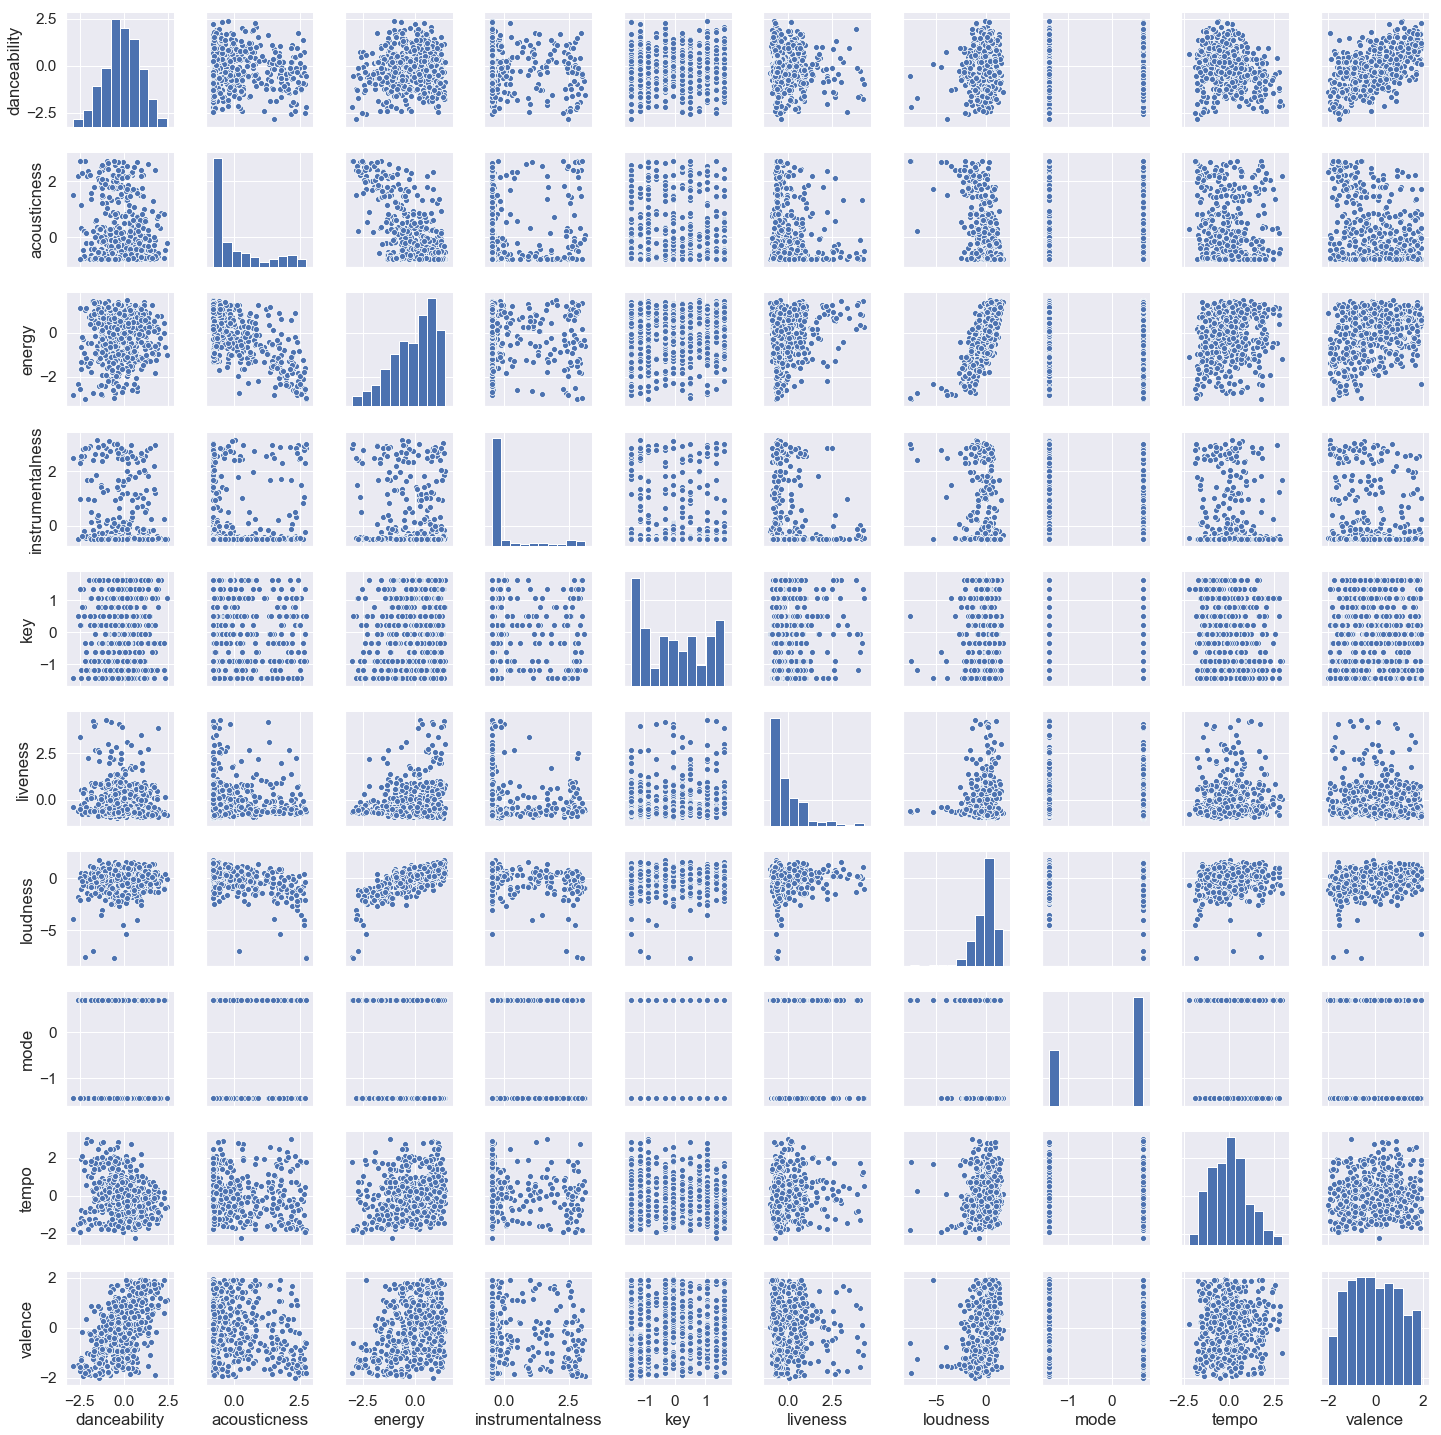

In [37]:
user2= user(test_user,random_user=False,features = cont.features)
user2.profile(data=cont.scaled_df)
user2.data
user2.data
user2.plotting()
user2.scatter.fig.savefig(r'plots\non_transformed_scatter.png')

In [17]:
user1= user(cont.users,200,215,features = cont.features)
user1.profile(data=cont.scaled_df)
user1.data
user1.data
user1.plotting()
#user1.scatter.fig.savefig(r'C:\Users\johan\Documents\GitHub\Thesis\plots\non_transformed_scatter.png')

NameError: name 'user' is not defined

# Exploration of distributions - figure out how to Box cox it

In [ ]:
n,x,_ = plt.hist(a[0],density=True)
plt.plot(x,den(x))
plt.show()

In [60]:
def power_transform(data,features):
    noi = np.random.normal(0,1,(10000,))
    den = stats.gaussian_kde(noi)
    transformed = np.empty((len(features),len(data)))
    lamb =np.empty((10,1))
    
    #fig.figsize(20,20)
    for i,k in enumerate(features):
        transformed[i],lamb[i] = stats.yeojohnson(data[k].values)
        fig,axs = plt.subplots(2,2,figsize=(20,20))

        fig.suptitle(k.capitalize(),fontsize=25,y=1.02)
        
        #prob plot of original
        prob = stats.probplot(data[k].values, dist=stats.norm, plot=axs[0,0])
        axs[0,0].set_xlabel('')
        axs[0,0].set_title('Probplot against normal distribution',fontsize=15)
        
        #distribution plot
        col=np.random.rand(3,)
        
        
        #axs[0,1].sns.distplot(data[k].values,color=col)
        axs[0,1].hist(data[k].values,color=col)
        axs[0,1].set_title('Unmodified Distribution',fontsize=15)
        
        #axs[0,1].sns.distplot(transformed[i].values,color=col)
        axs[1,1].hist(transformed[i],color=col)
        axs[1,1].set_title(f'Transformed Distribution, lambda: {np.round(lamb[i],2)[0]}',fontsize=15)
    
        prob = stats.probplot(transformed[i], dist=stats.norm, plot=axs[1,0])   
        axs[1,0].set_title('Probplot after Yeo Johnson transformation',fontsize=15)
        fig.tight_layout(pad=2.5)
        #fig.show()
        fig.savefig(fr'plots\{k}_transformation.png')
    return transformed  

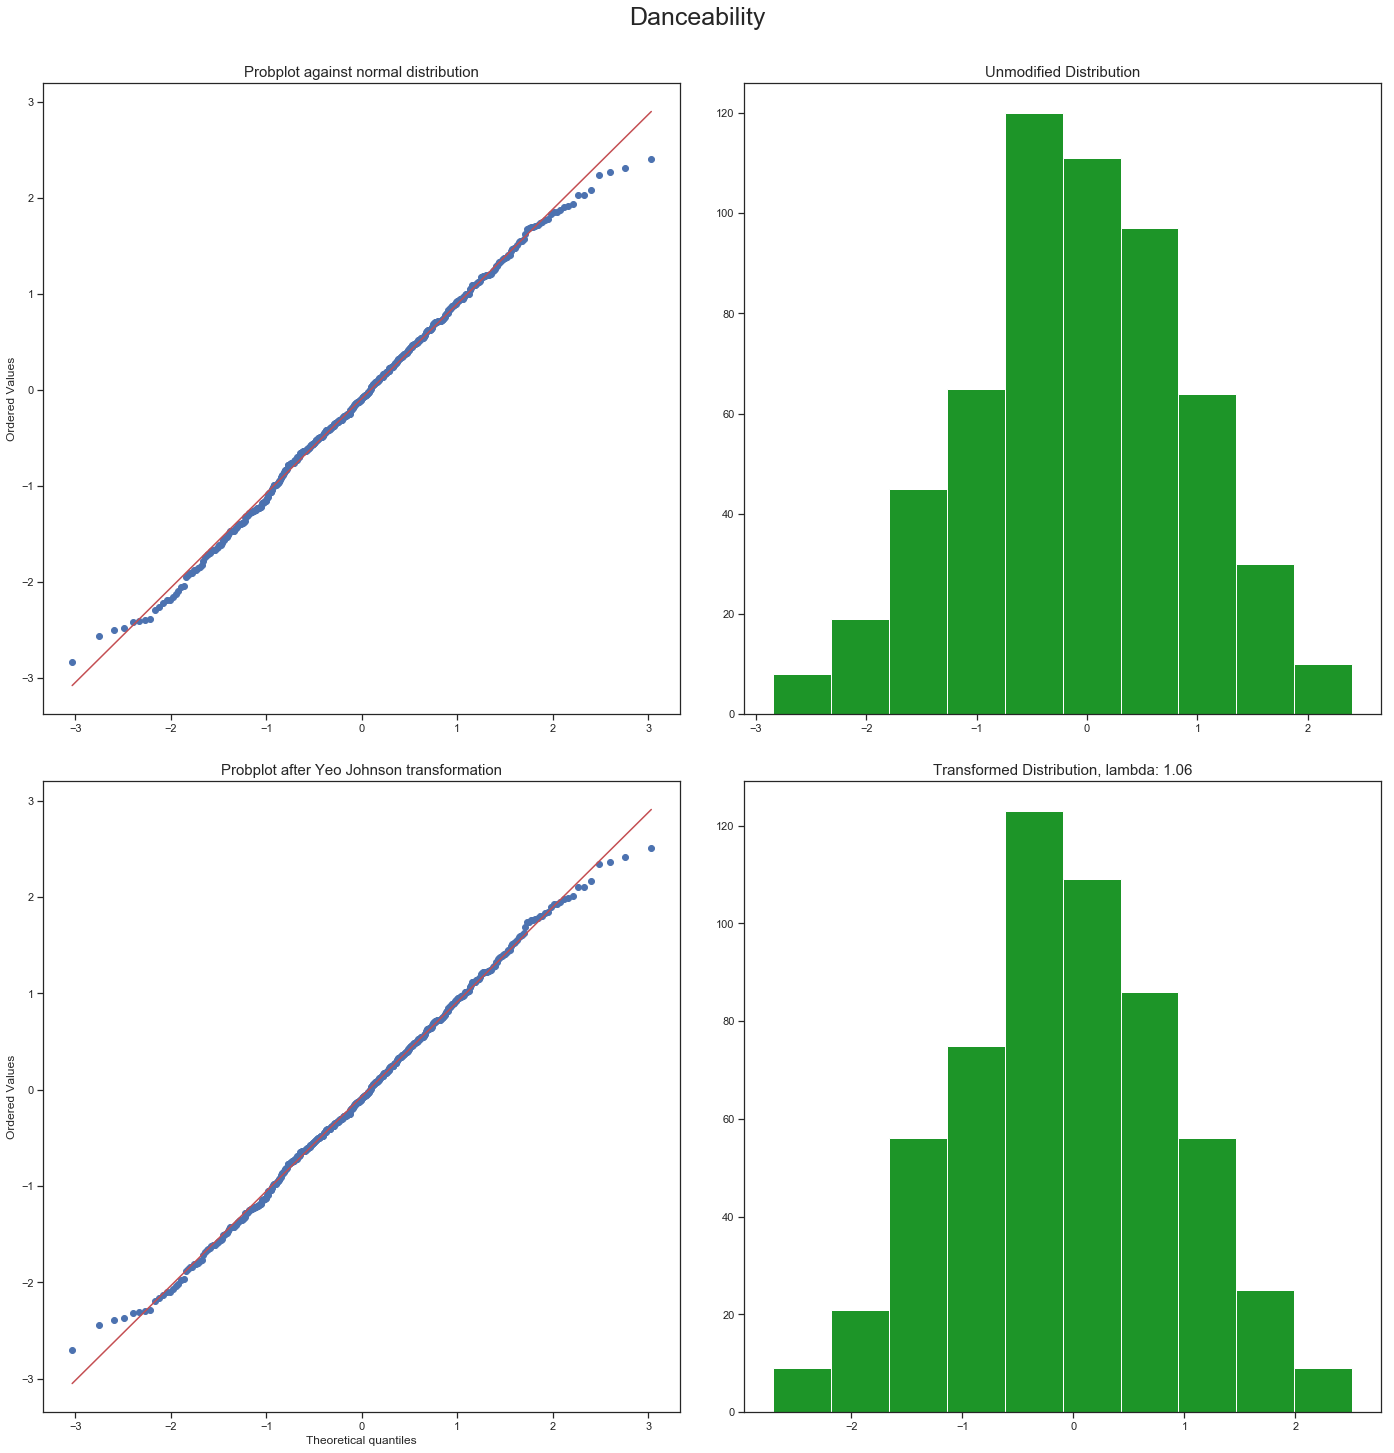

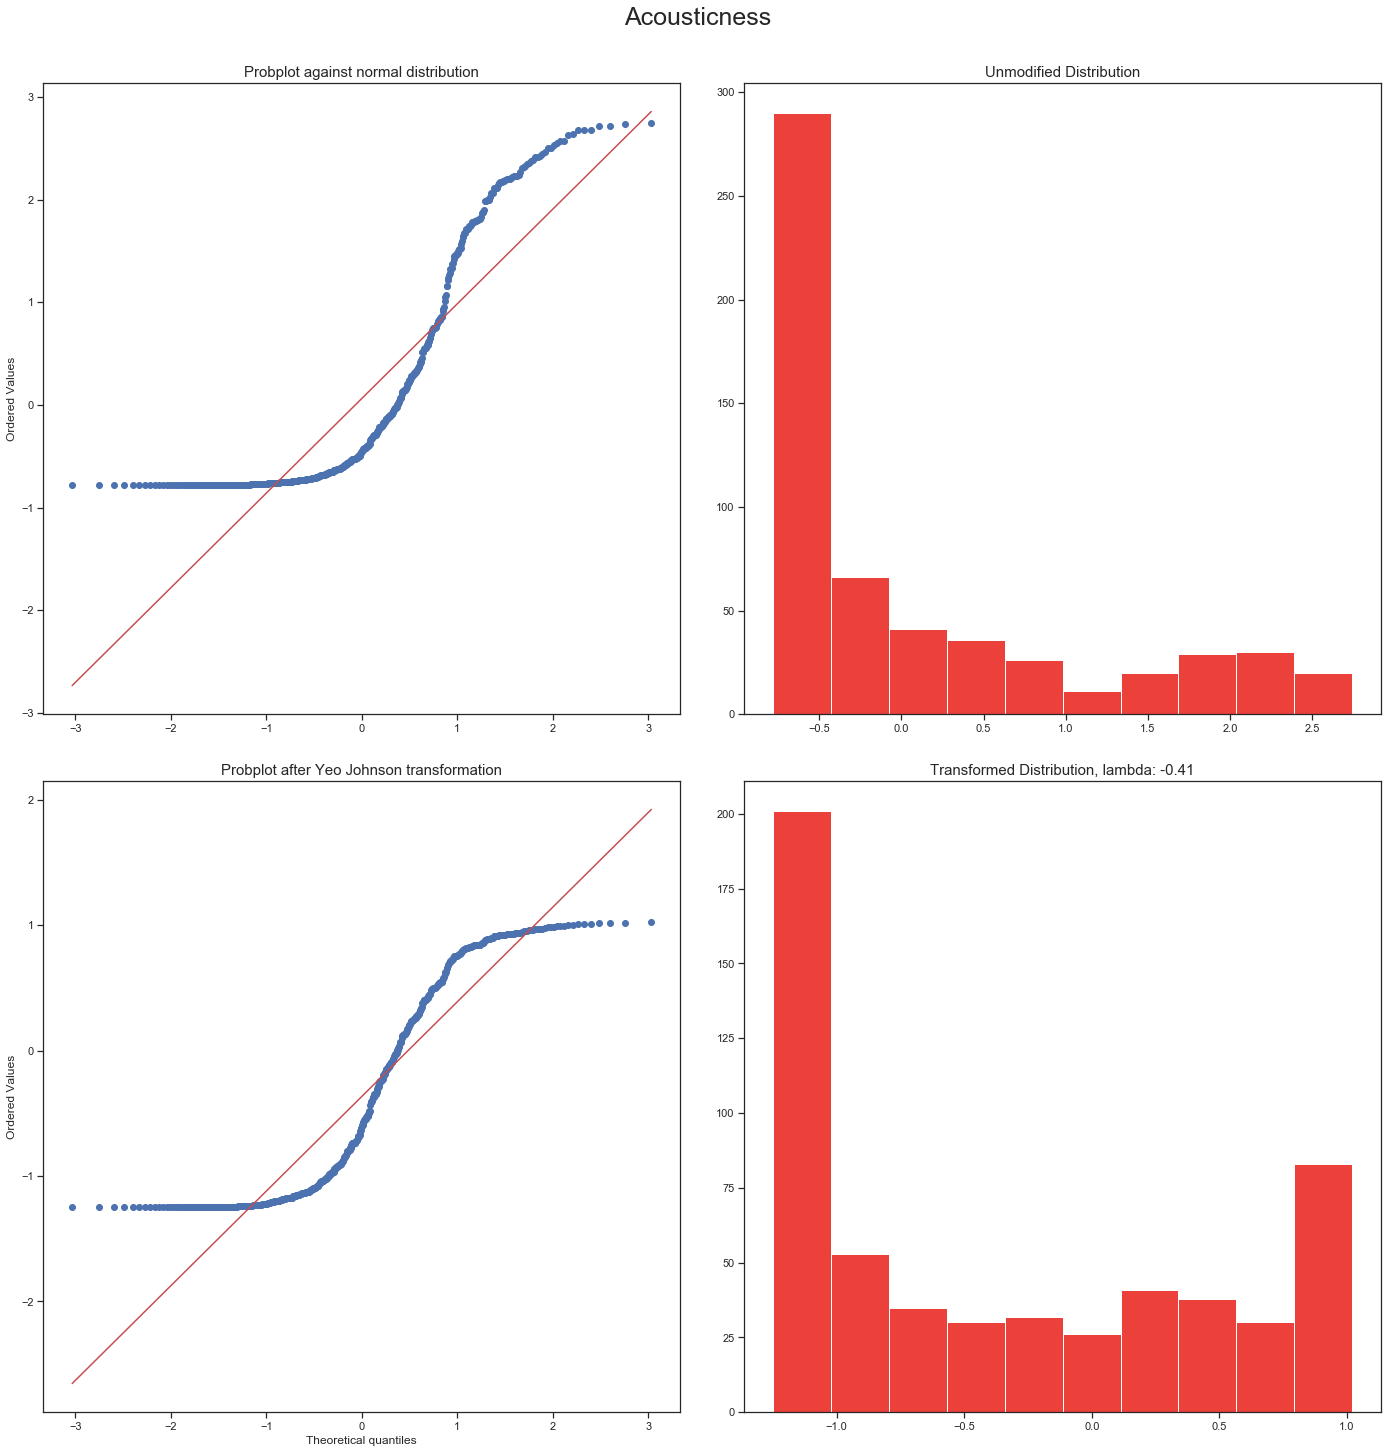

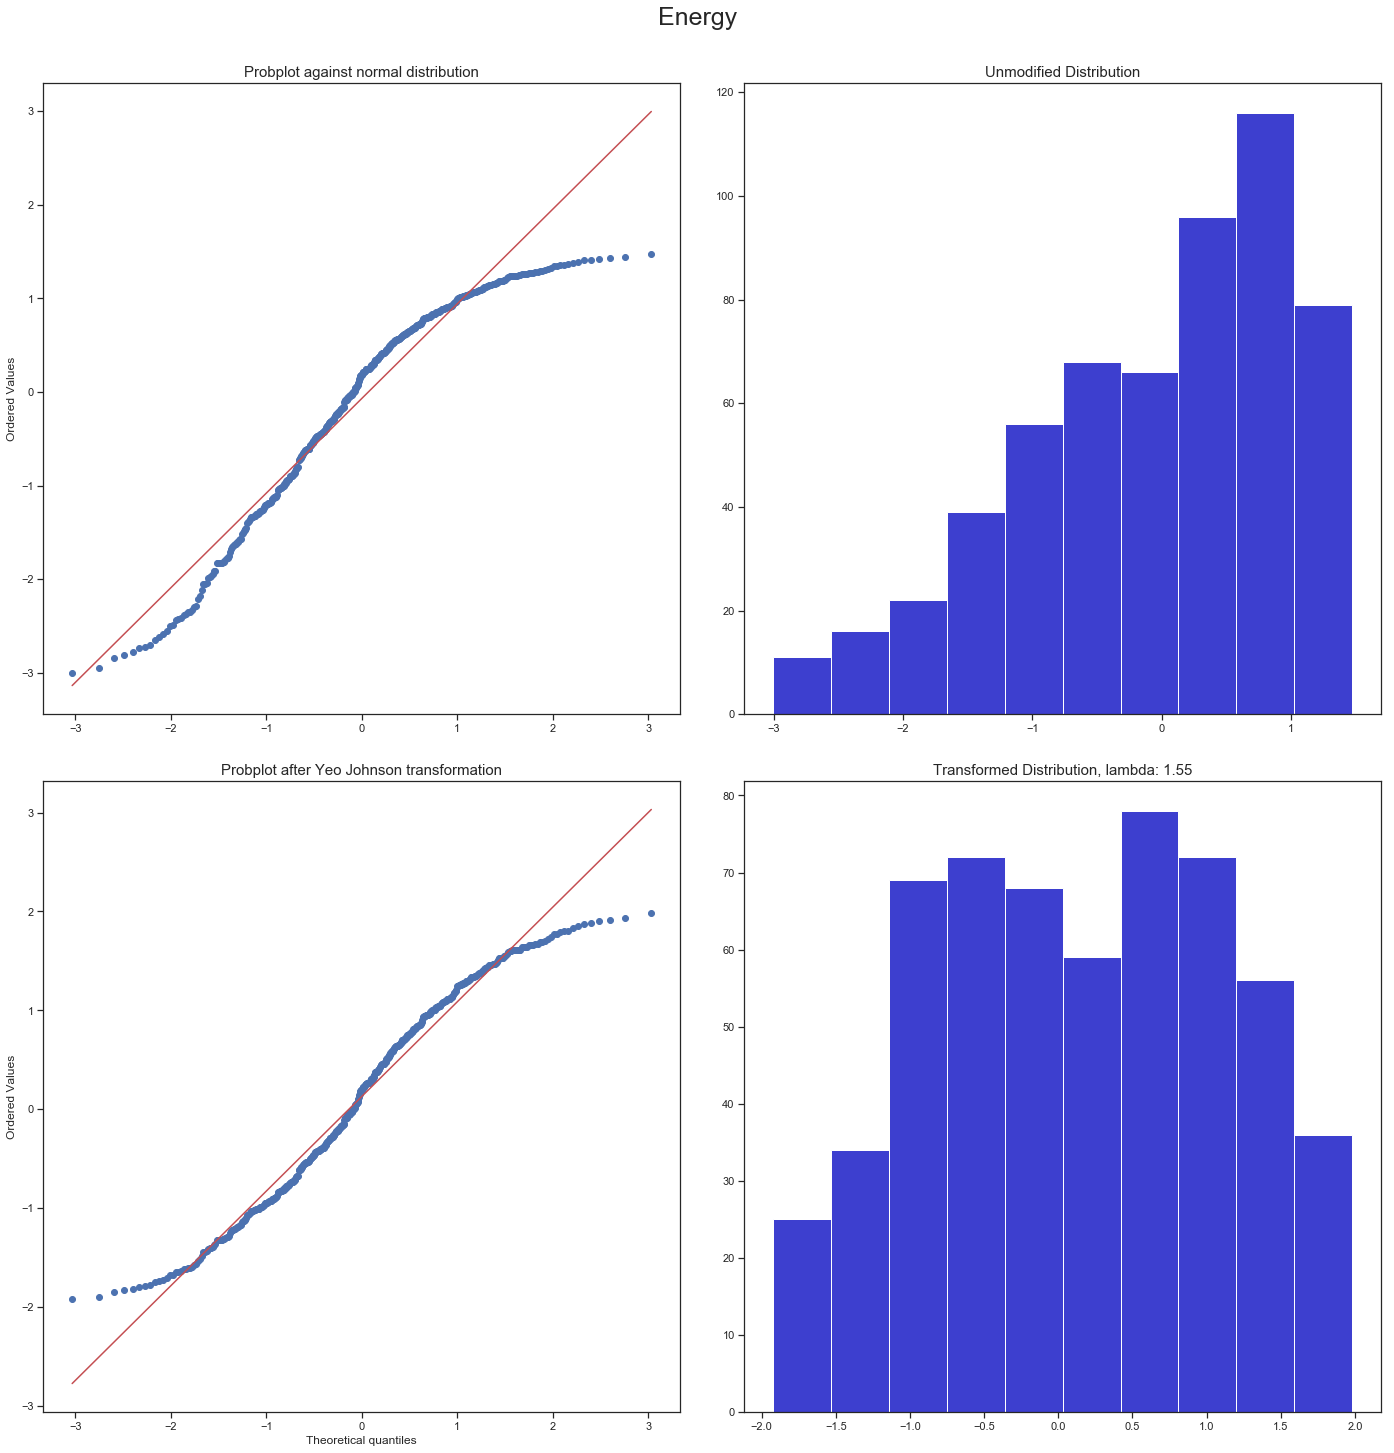

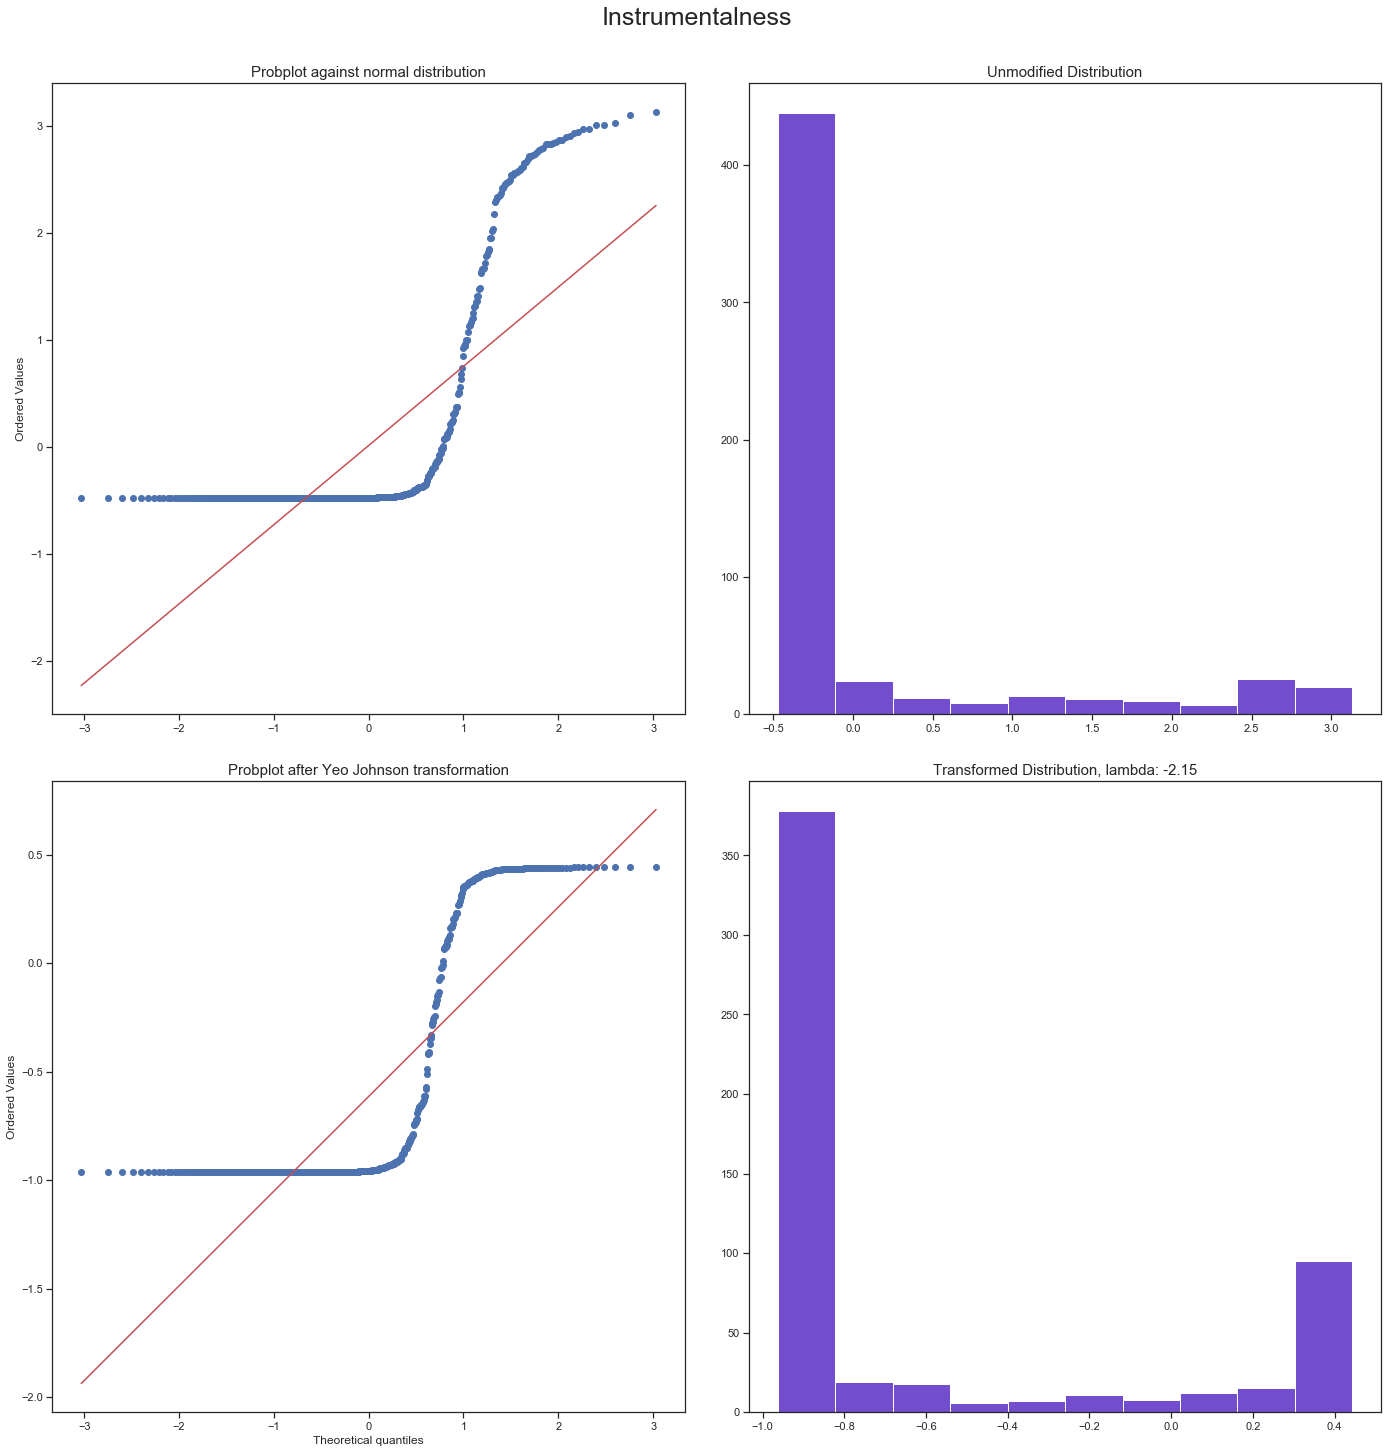

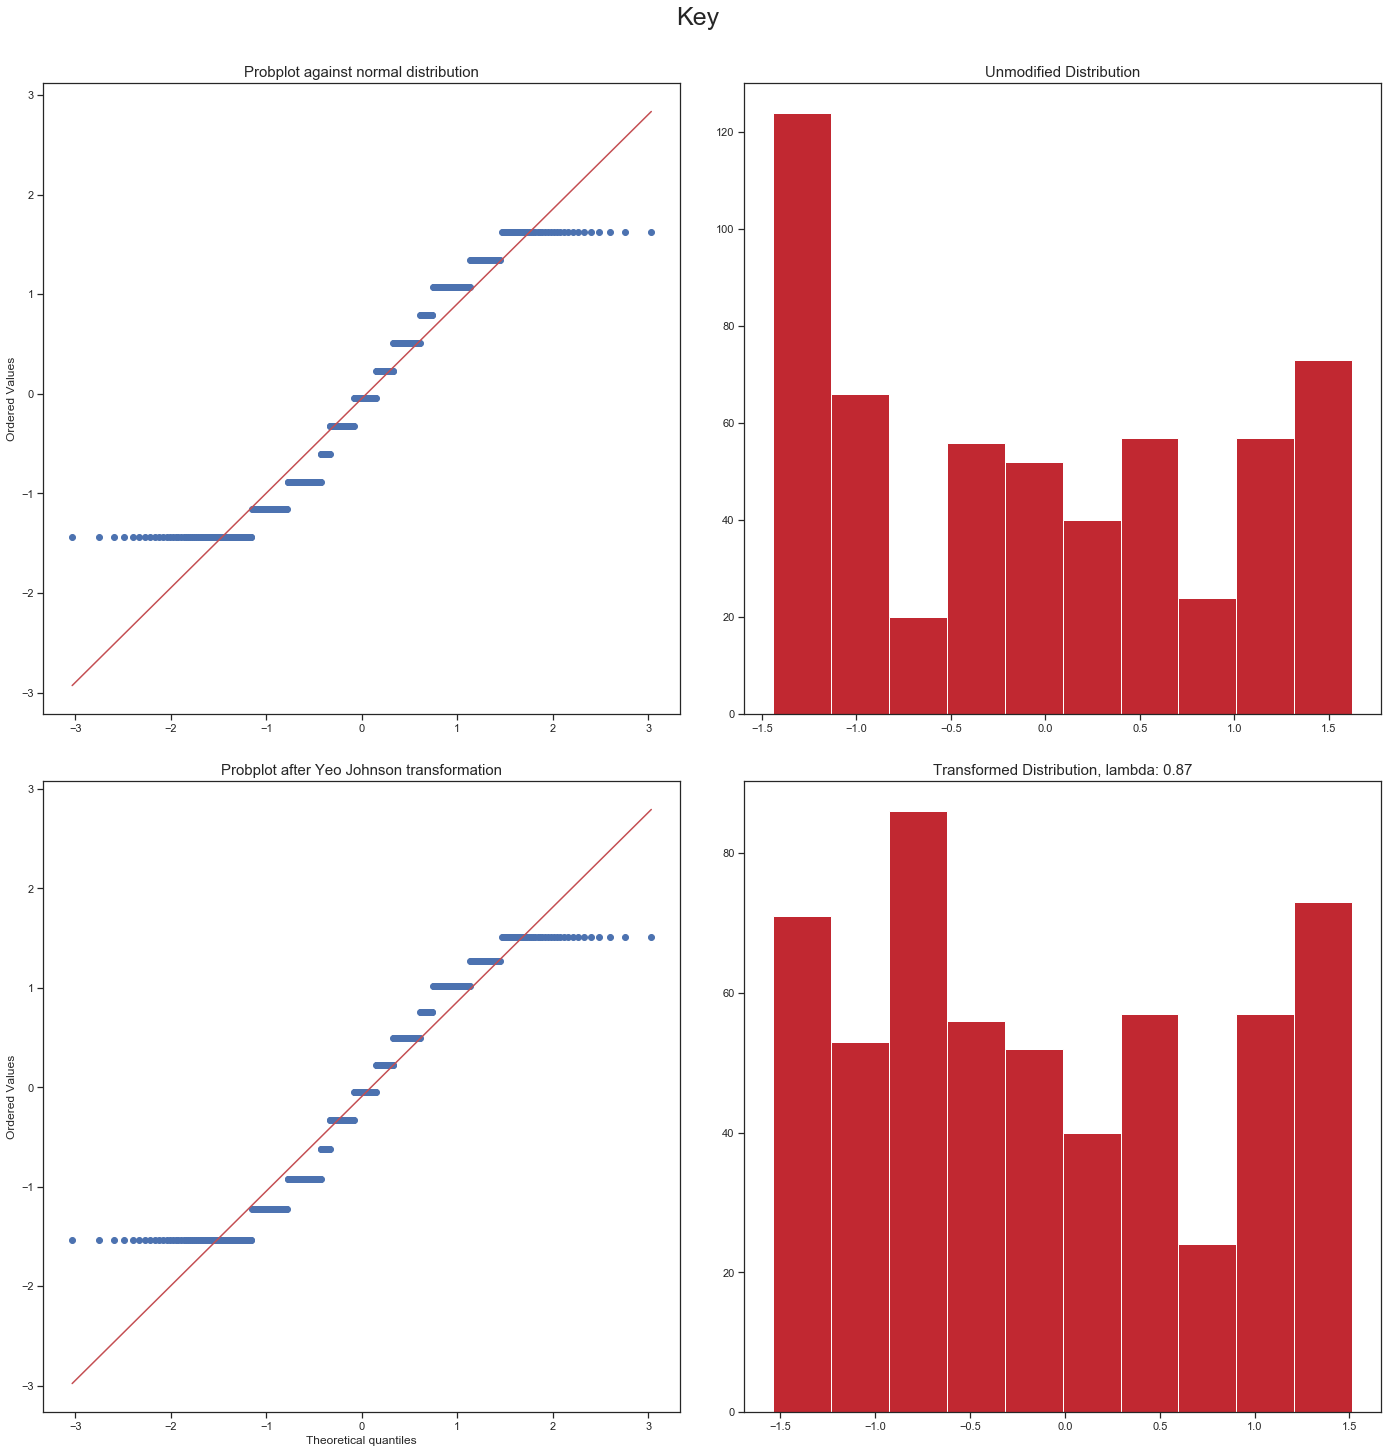

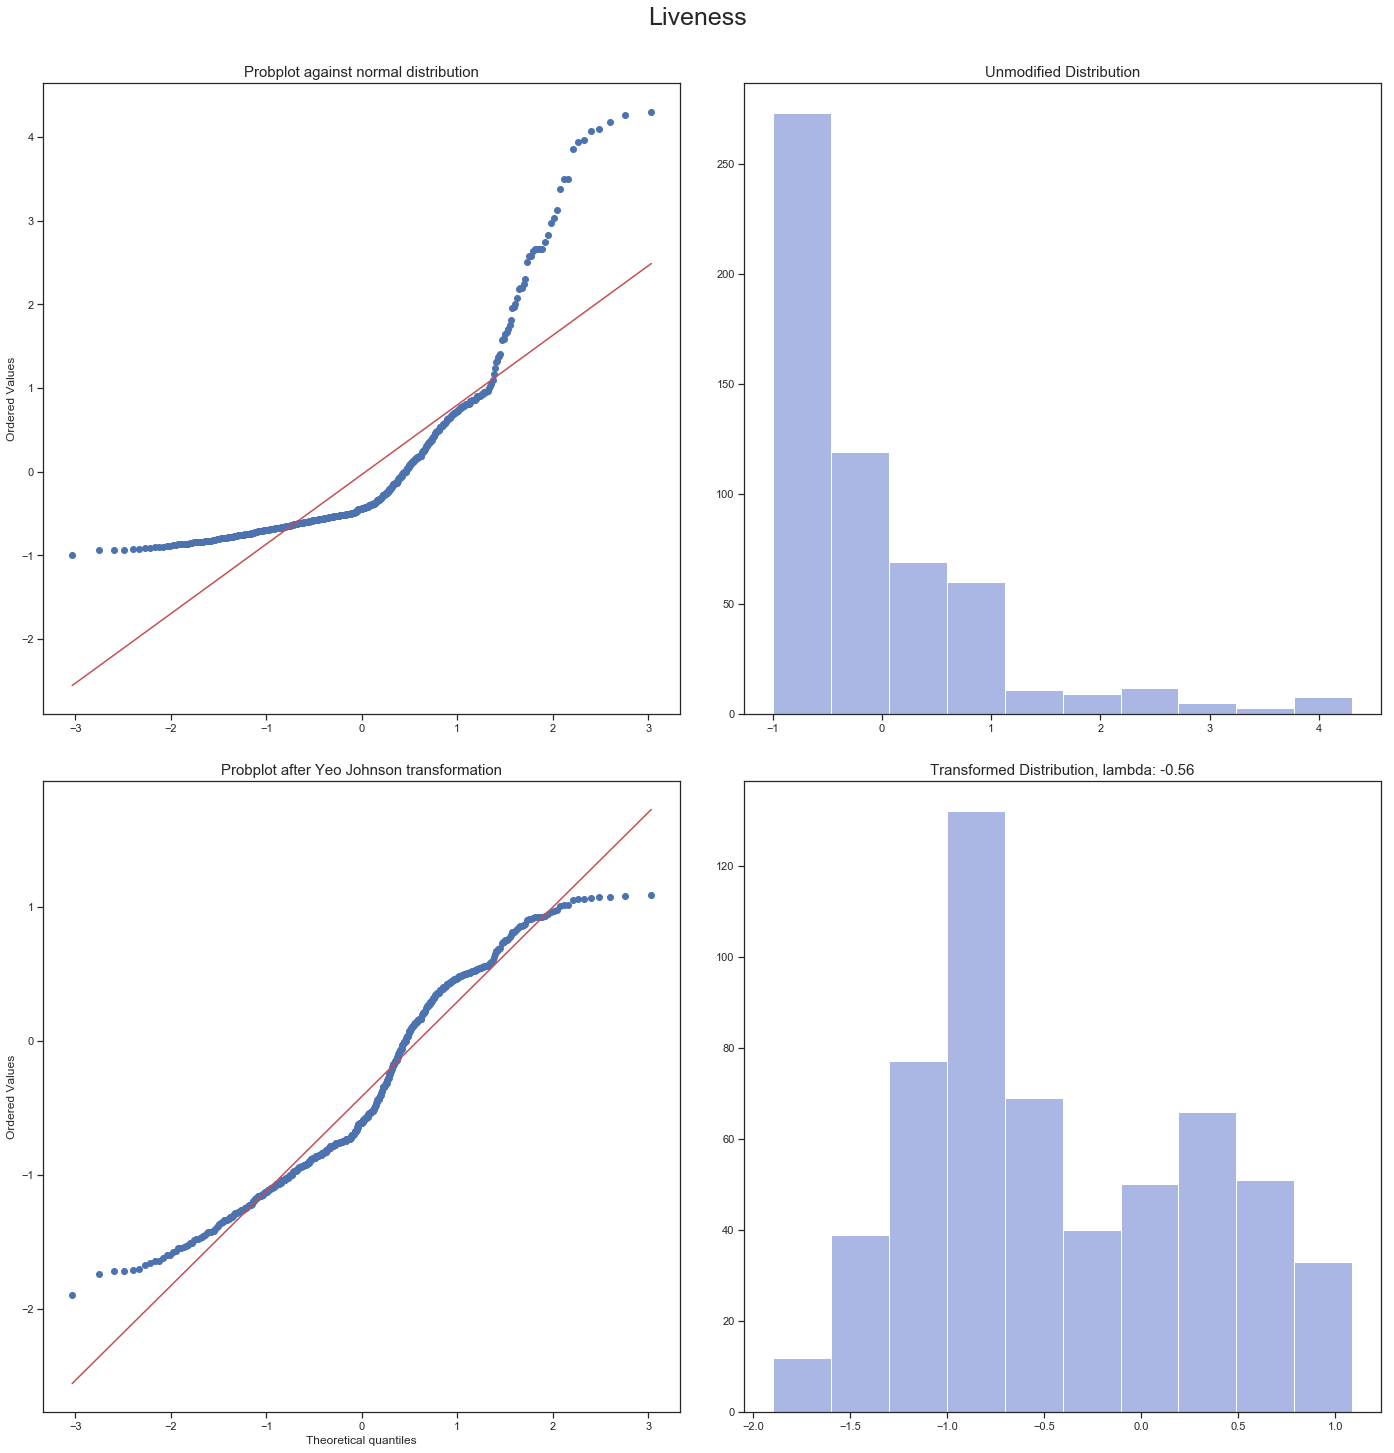

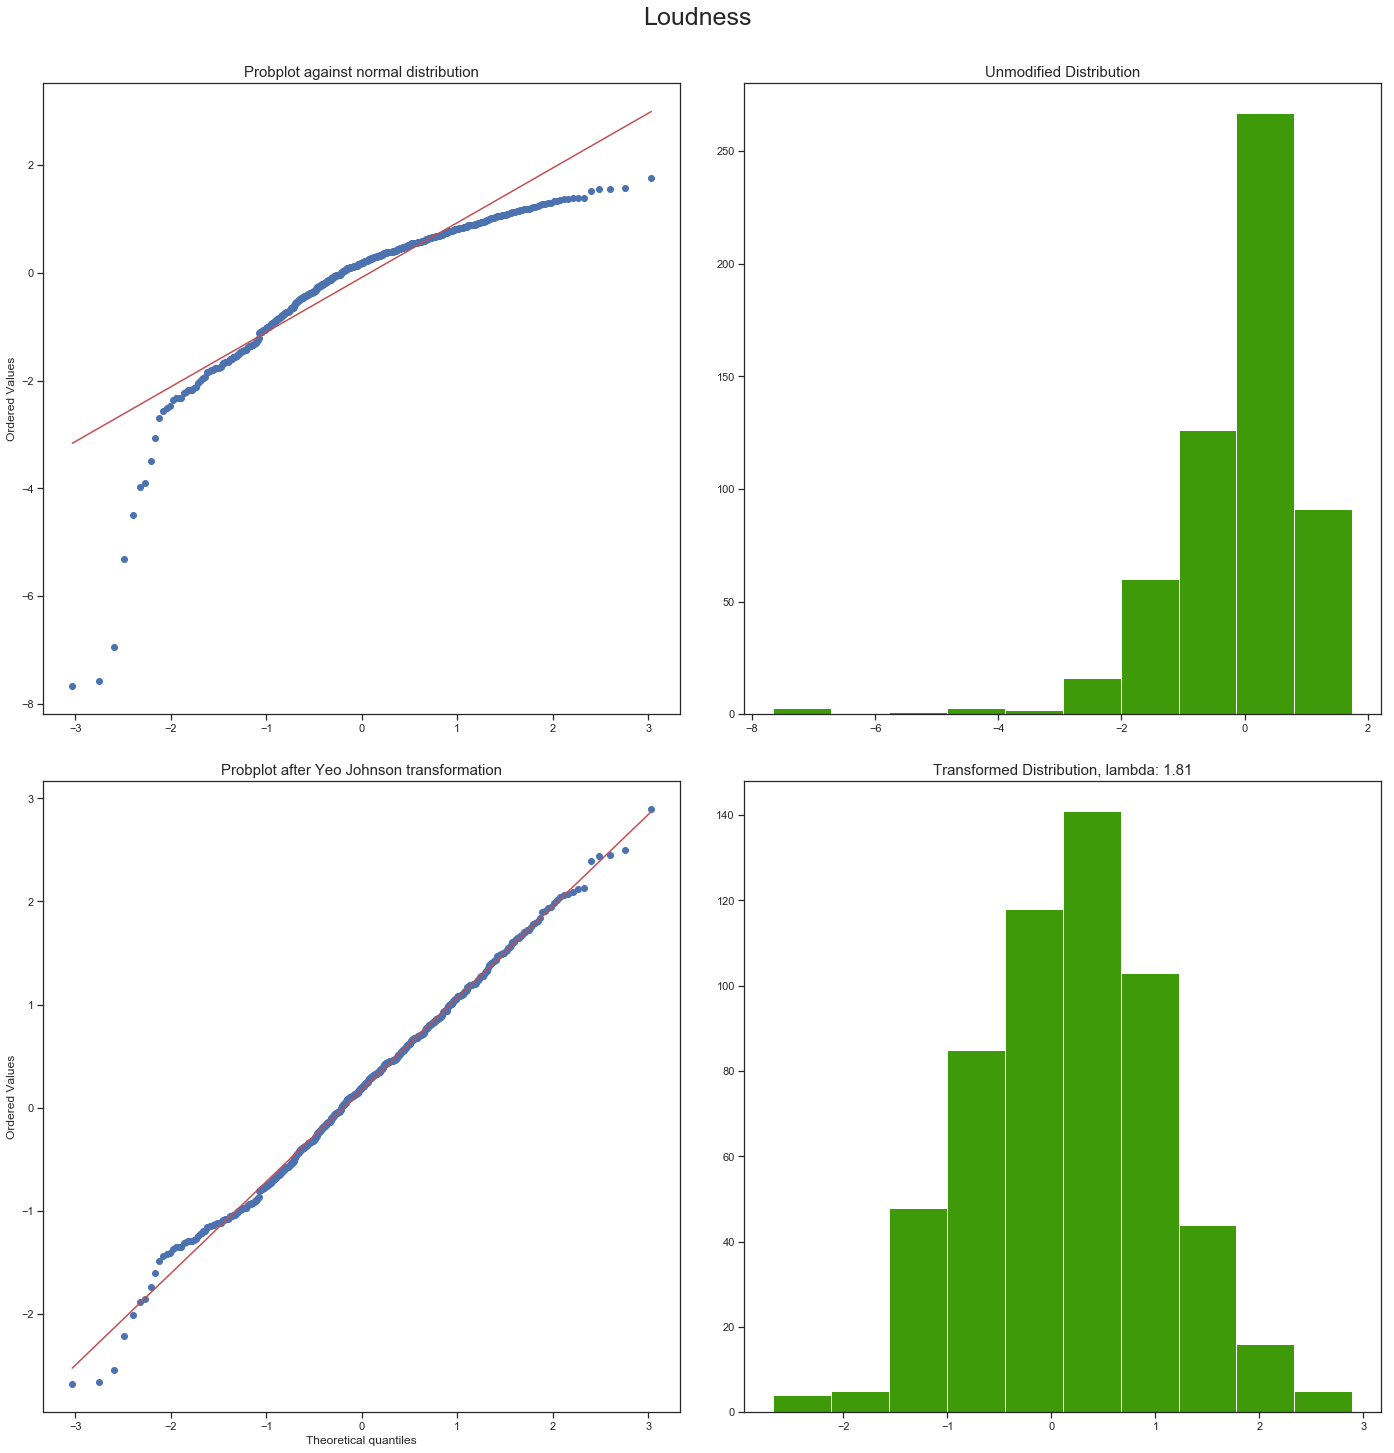

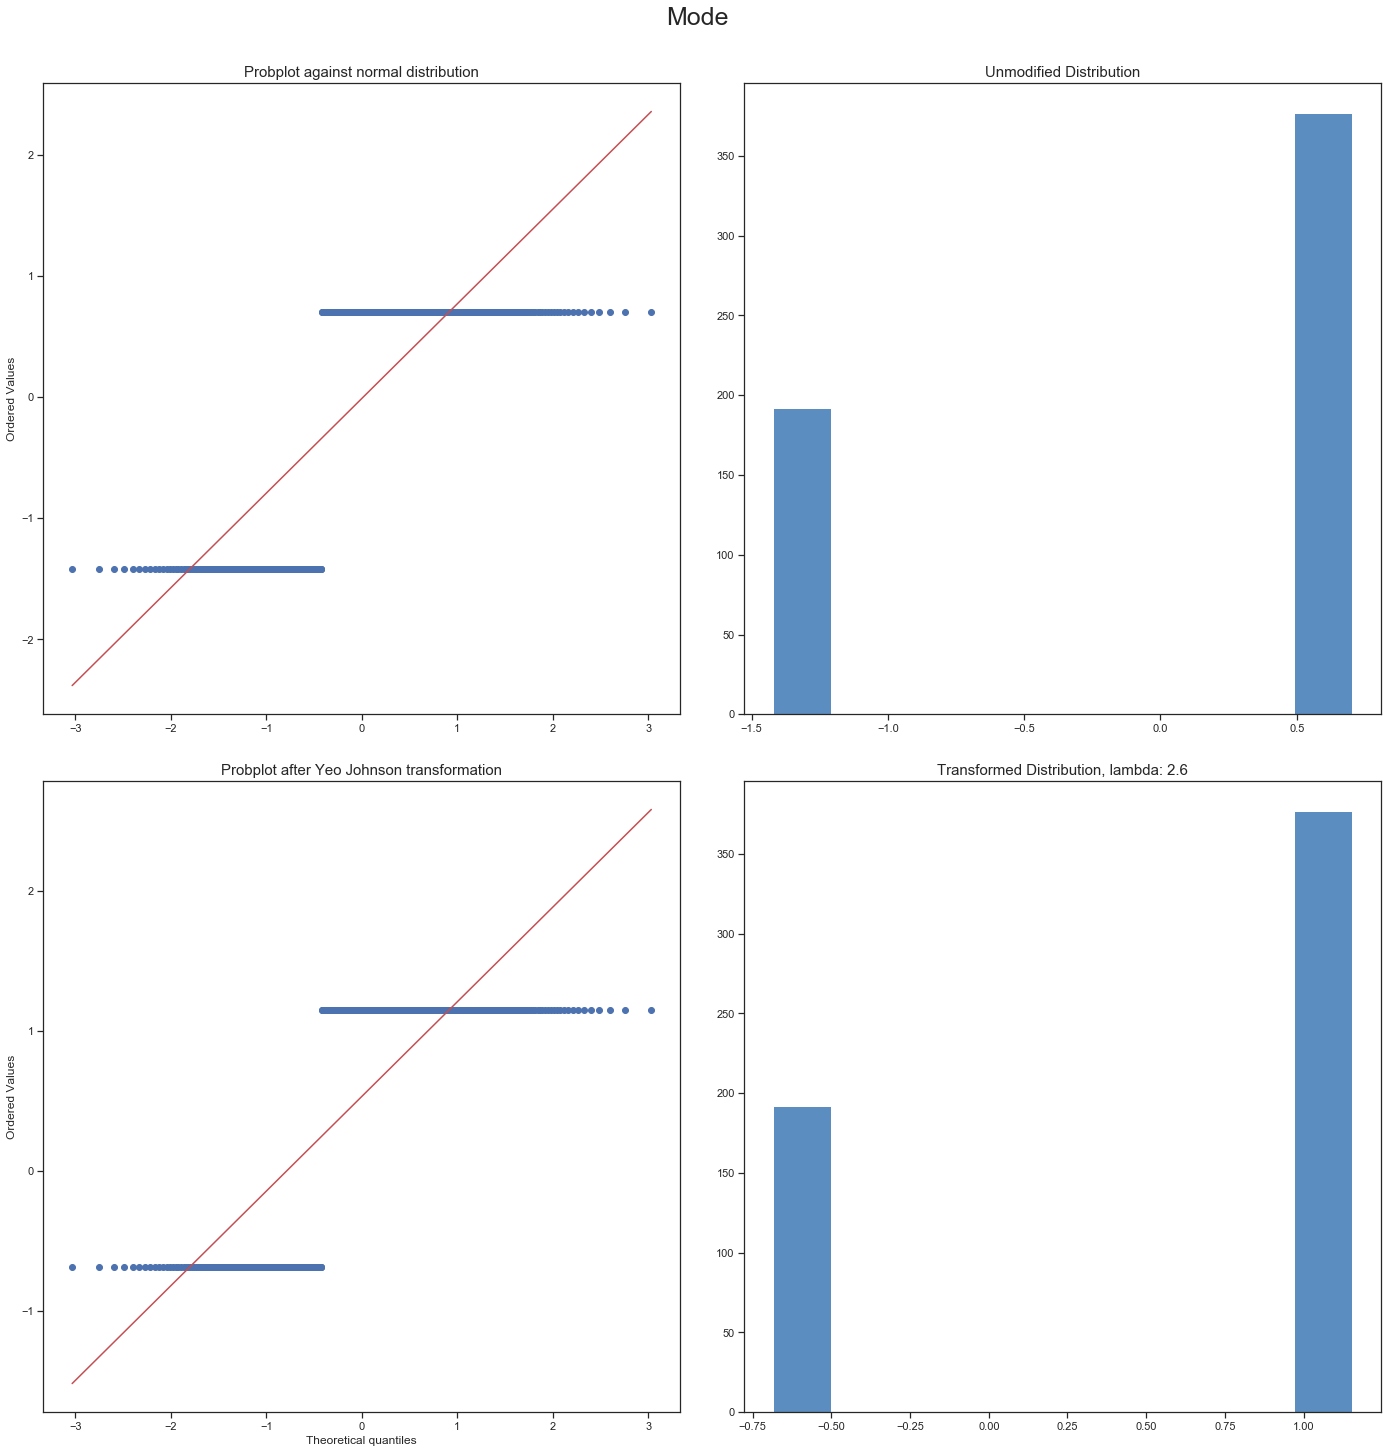

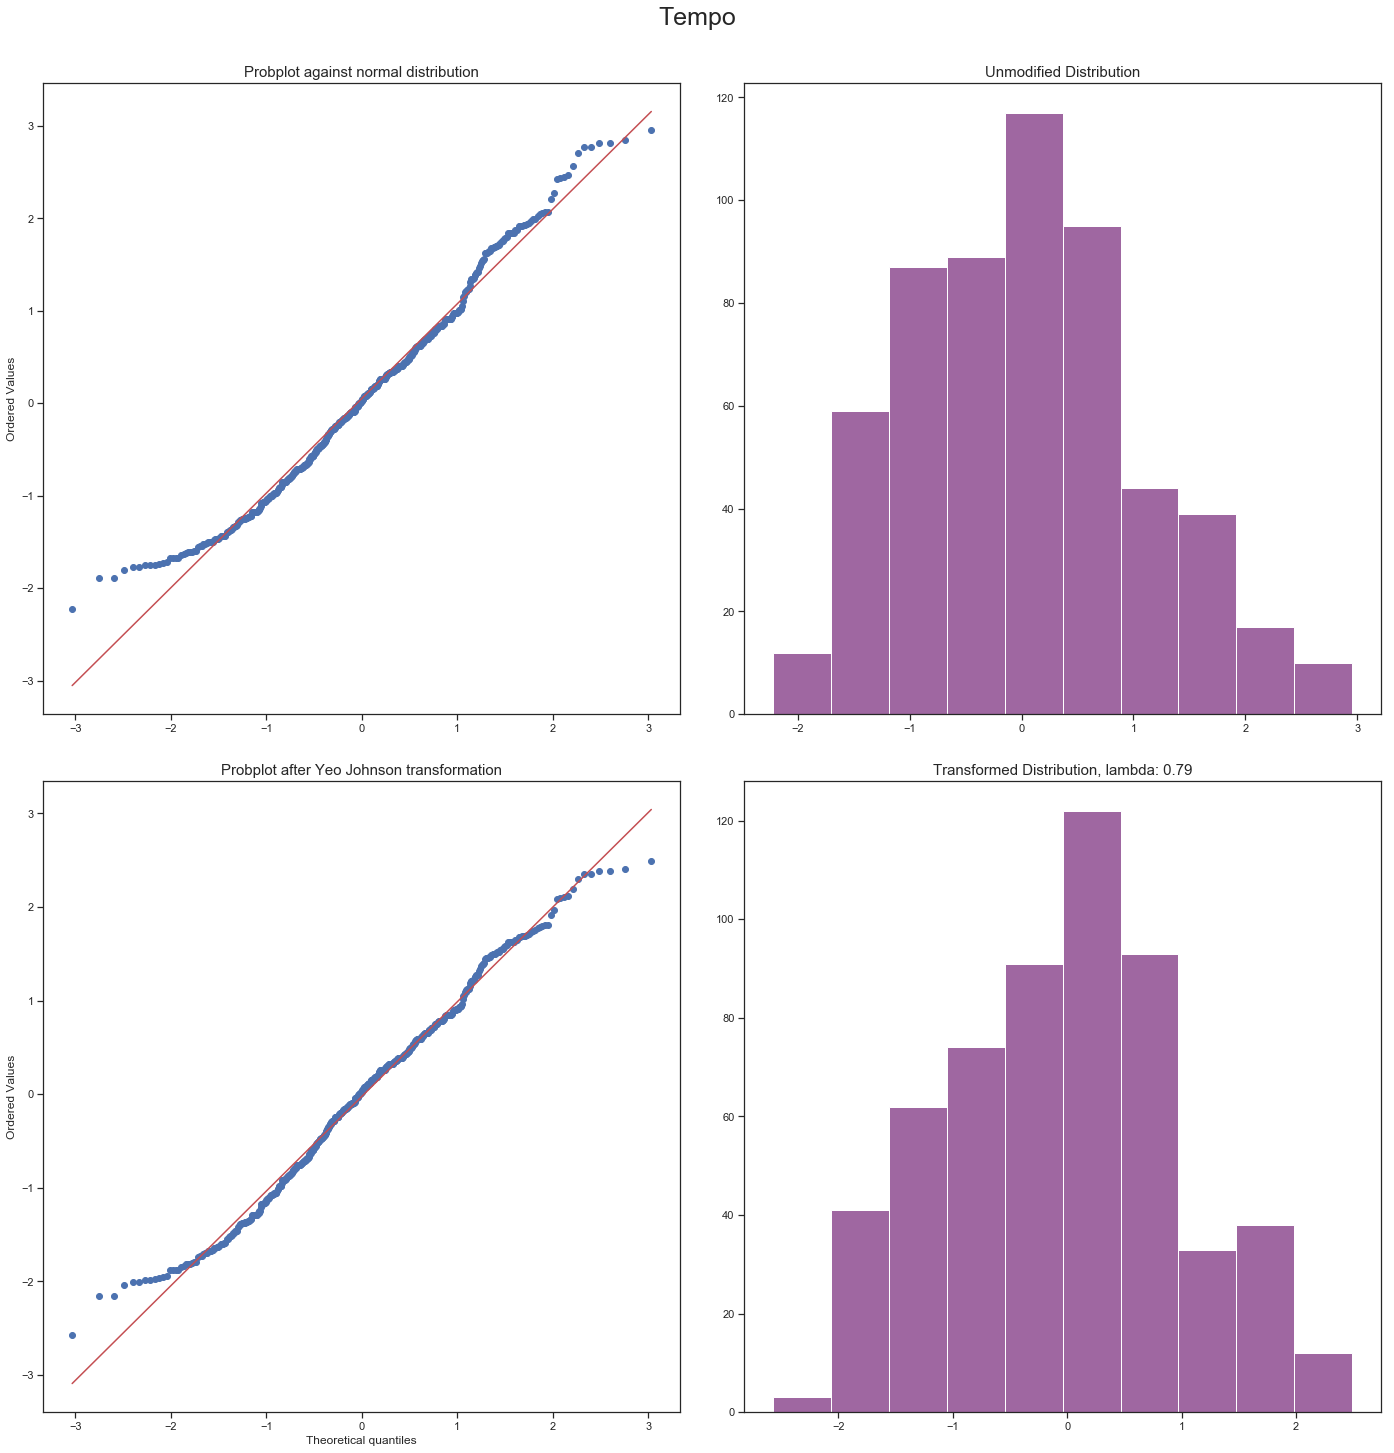

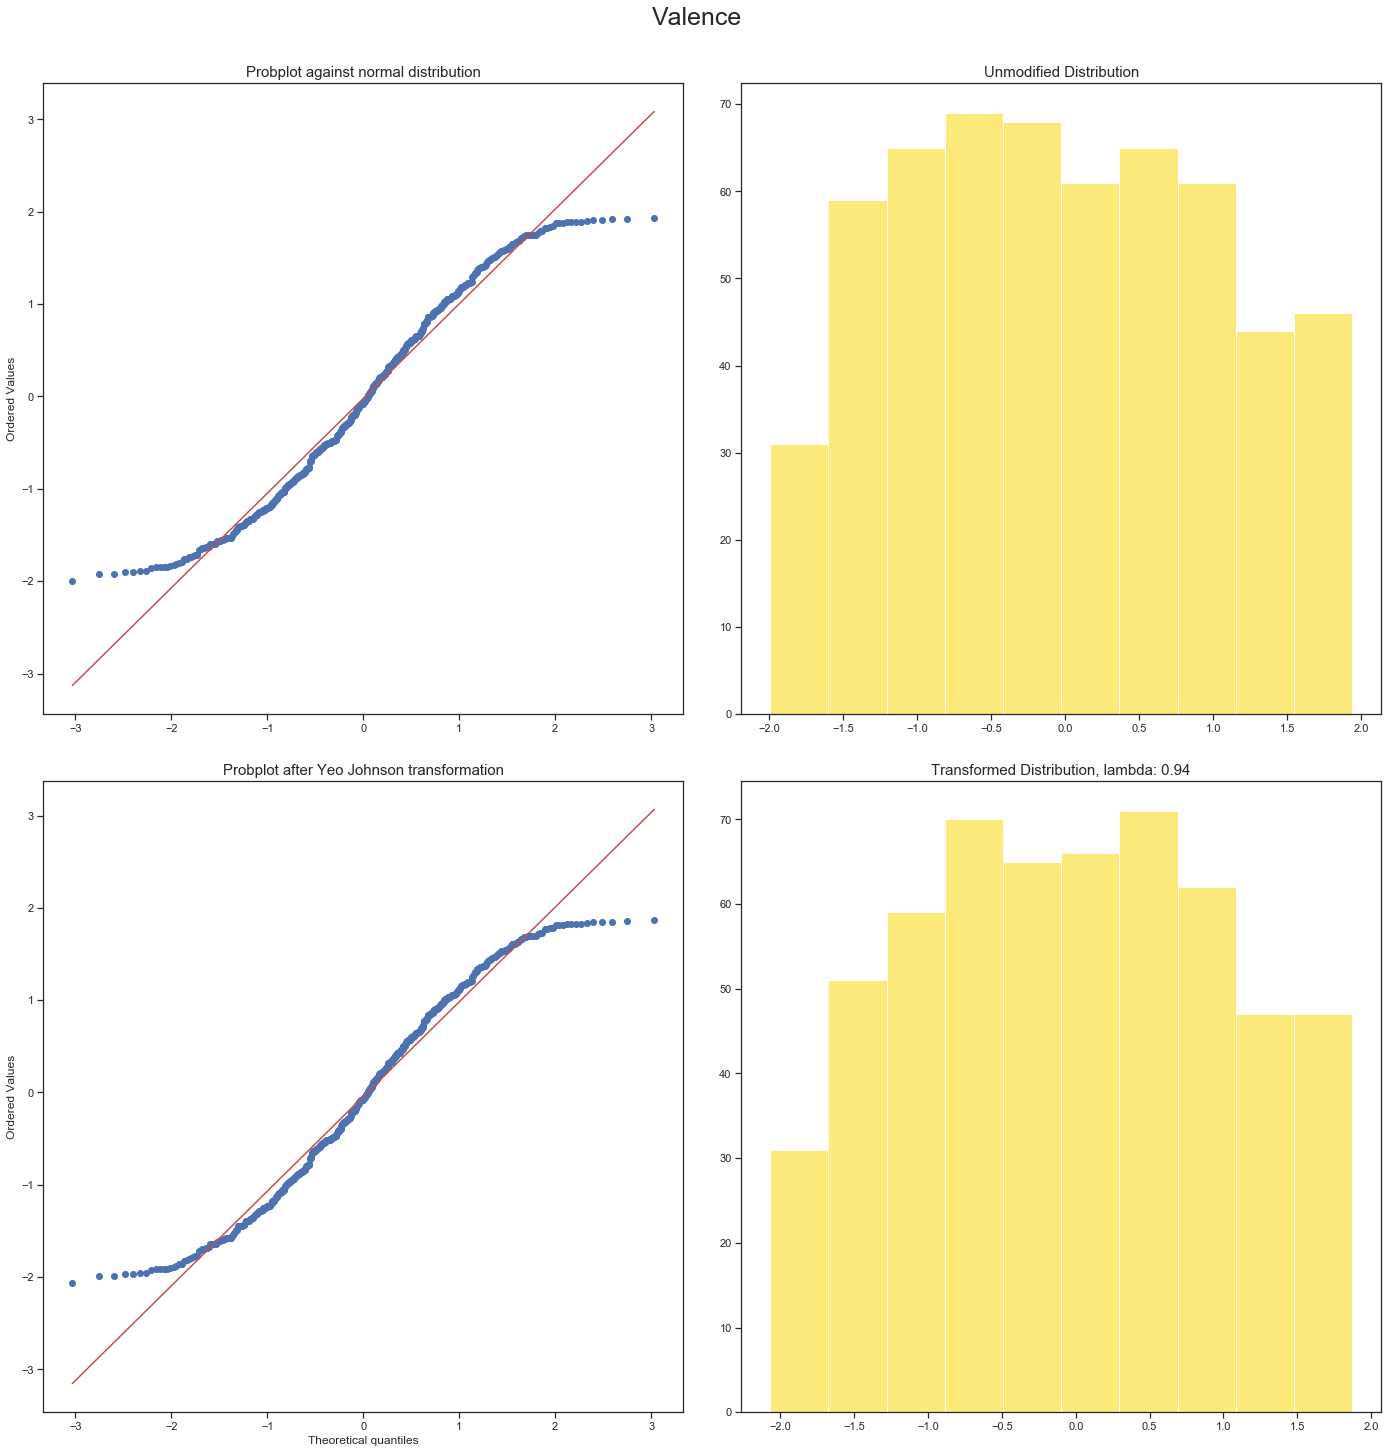

In [61]:
a = power_transform(user2.data,user2.features)

In [ ]:
user1.data[user1.features].values.shape

In [ ]:
user1.data.head(1)

In [ ]:
testing = user1.data.liveness.values
plt.hist(testing)
plt.show()

# Create content model for unsupervised 

In [ ]:
class content_model():
    def __init__(self,all_songs,scaled_df,which_data=True):
        self.scaled_df = scaled_df.copy()
        self.all_songs = all_songs.copy()
        print(f'First there was {len(self.all_songs)} rows')
        check = len(self.all_songs)
        def test():
            if which_data: #if we get the all_songs csv or our previous dataframe, 
                self.all_songs.drop_duplicates(subset='name',inplace=True,keep='first')
            else:
                self.all_songs.drop_duplicates(subset='song_id',inplace=True,keep='first')
            print(f'After dropping duplicates there is {len(self.all_songs)} songs left')

        #if we had some reccuring songs, but if not pandas threw error, therefore the check
        if len(self.all_songs)!= check: 
            self.all_songs.reset_index(inplace=True)
        self.vect = self.all_songs[['danceability', 'acousticness',
         'energy','instrumentalness','key','liveness','loudness','mode','tempo',
         'valence']]
        if which_data:
            self.labels = self.all_songs[['name','artists','id']]
        else:
            self.labels = self.all_songs[['title','artist_name','ids']]
            self.labels.rename(columns={'title':'name','artist_name':'artists',
                                       'ids':'id'},inplace=True)
    def scale_songs(self): #scale the songs 
        scaler= StandardScaler()
        scaled = scaler.fit_transform(self.vect)
        self.scaled_songs = pd.DataFrame(scaled,columns=self.vect.columns)
        print('Scaled succesfully')
    def KNN(self,nn,algo='kd_tree'): #apply KNN algo
        self.nn=nn
        self.nbrs = NN(n_neighbors=nn,algorithm=algo).fit(self.scaled_songs)
        print('KNN performed')
    def KNN_rec(self,user,feature_approx): #recommend based on given feature approximation
        point = np.array(feature_approx).reshape(-1)
        pred = self.nbrs.kneighbors([point])
        song_list = self.vect.copy()
        song_list[['Title','Artist']] =self.labels #adding the lables to songs
        self.recs =song_list.loc[pred[1][0],['Title','Artist']] #Getting the songs given by model
        
        print('The user has the following profile:')
        #radar_plot()
        print(self.scaled_df.loc[user,['title','artist_name']])
        print('\nSongs recomended based on features:')
        print(song_list.loc[pred[1][0],['Title','Artist']])
    def fuzzy(self):
        fcm = FCM(n_clusters=1)
    def recommend(self,predictions,size):
        print('Creating Recommendations')
        points= np.array(
            (predictions.loc[:,'features'].to_list())).reshape(size,10)
        
        self.pred = np.array([self.nbrs.kneighbors([points[i]])[1] 
                for i in range(0,size)]).reshape(size,self.nn)
        
        recs = [self.labels.loc[i,'id'].to_list() for i in self.pred]
        predictions['cb_recommended'] = recs
        self.result = predictions
        print('Recommendations created succesfully, use self.result to display')

In [ ]:
all_songs = pd.read_csv('datasets/songs_data2.csv',index_col=0)
#model = content_model(all_songs,cont.scaled_df)
#model = content_model(cont.df,cont.scaled_df,False)
model_uns = content_model(cont.df,cont.scaled_df,False)
model_uns.scale_songs()
model_uns.KNN(5)
model_uns.recommend(preds,100)
#model.result.drop(columns='Predict',inplace= True)
model_uns.result.head()
#model.KNN_rec(cont.user,cont.song)

# Supervised learning approach

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import export_graphviz
import pydot

In [ ]:
#Supervised learning functions
class supervised(user):
    def __init__(self,data,users,features):
        self.features = features
        self.data= data
        self.users= users
    def profile(self):
        
        
        # the dataframe with all user info
        self.data = data.loc[self.id,:]
        print(f'Current user has {len(self.data)} songs')
        #for i in self.df
    def tts(by):
        x=2

In [ ]:
x_train=np.empty(())

In [ ]:
len(users)

In [ ]:
test_user= user(cont.users,200,215,features = cont.features)
test_user.profile(data=cont.scaled_df)

x_train,x_test,y_train,y_test = train_test_split(cont.scaled_df.loc[test_user.id,cont.features],
                                                 cont.scaled_df.loc[test_user.id,'listen_count'],
                                                 random_state=42,shuffle=False,test_size=0.2)


In [ ]:
cont.scaled_df.head(1)

In [ ]:
start= time.time()
rf = RandomForestRegressor(random_state=3)
rf.fit(x_train.values, y_train.values)
#RandomForestRegressor(max_depth=2, random_state=0)
print(rf.feature_importances_)
print(time.time()-start)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
mse = np.mean(np.power(np.subtract(predictions,y_test),2))

# Print out the mean absolute error (mae)
print('MAE:', round(np.mean(errors), 2))
print('MSE: ',mse)

In [ ]:
ttt = pd.DataFrame({'test':y_test,'pred':predictions})
ttt

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
first_acc = evaluate(rf,x_train.values, y_train.values)

# Random Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train.values, y_train.values)

In [ ]:
best_random

In [ ]:

base_model = RandomForestRegressor(n_estimators = 2000, random_state = 42,
                                   max_features= 2,
                                   max_depth=100)
base_model.fit(x_train.values, y_train.values)
base_accuracy = evaluate(base_model,x_test.values, y_test.values)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,x_test.values, y_test.values)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [ ]:
#Cross validation

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [1000,1500,1600,2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(x_test.values, y_test.values)
grid_search.best_params_


In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test.values, y_test.values)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


In [ ]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = cont.features, rounded = True, precision = 1)
(graph,) = pydot.graph_from_dot_file(r"C:\Users\johan\Documents\GitHub\Thesis\tree.dot")
graph.write_png('tree.png')

# Vanilla NN approach

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
x_train.shape

In [ ]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
def model(shape):
    model = Sequential()
    model.add(Dense(60, activation='relu', input_shape=(10,)))
    model.add(Dropout(0.2))
    #model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='relu'))
    model.compile(optimizer='adam', loss='mse')
    return model
model1 = model(x_train.shape)
#compile model using mse as a measure of model performance

#train model
hist = model1.fit(x_train, y_train, validation_split=0.25, epochs=50,verbose=1)

In [ ]:
preds = model1.predict(x_test)
model1.evaluate(x_test,y_test)

In [ ]:
songs= cont.scaled_df.copy()
songs.drop_duplicates(subset='ids',inplace=True,keep='first')
labels = songs.pop('ids')
songs = songs.loc[:,cont.features]
songs.head(2)

In [ ]:
pred_neural= (model1.predict(songs)).reshape(-1)
print(pred_neural.shape)
model_recs = pd.DataFrame({'Predictions':pred_neural,'ids':labels})
model_recs.sort_values(by='Predictions',inplace=True,ascending=False)
model_recs.reset_index(inplace=True,drop=True)
model_recs.head(5)




In [ ]:
rf_preds = rf.predict(songs)
rf_recs = pd.DataFrame({'Predictions':rf_preds,'ids':labels})
rf_recs.sort_values(by='Predictions',inplace=True,ascending=False)
rf_recs.reset_index(inplace=True,drop=True)
rf_recs.head(5)

In [ ]:
def prediction_df(model,data,features = cont.features):
    songs= data.copy()
    #songs.reset_index(drop=True,inplace=True)
    songs.drop_duplicates(subset='ids',inplace=True,keep='first')
    labels = songs.pop('ids')
    songs = songs.loc[:,features]
    #print(songs.head(1))
    
    rf_preds = model.predict(songs)
    rf_recs = pd.DataFrame({'Predictions':rf_preds,'ids':labels})
    rf_recs.sort_values(by='Predictions',inplace=True,ascending=False)
    rf_recs.reset_index(inplace=True,drop=True)
    return rf_recs

In [ ]:
def get_PoR(user_data,model_data,size):
    total_relevant = test_user.data.loc[:,'ids']
    recommend = model_data.loc[:size,'ids']
    relevant = [set(recommend) & set(total_relevant)][0]
    precision = round((len(relevant)/size)*100,3)
    
    recall= len(relevant)/len(total_relevant)*100
    return precision,recall



In [ ]:
opt_rf = prediction_df(model=best_grid,
                       data=cont.scaled_df)
opt_rf.head(5)

In [ ]:
get_PoR(user_data= test_user.data,model_data=opt_rf,size=10)

In [ ]:
get_PoR(user_data= test_user.data,model_data=model_recs,size=10)

In [ ]:
get_PoR(user_data=test_user.data,model_data=rf_recs,size=10)

In [ ]:
len(cont.users)

In [ ]:
grid_search.best_params_

In [ ]:
scores = []
models= []
start=time.time()
for i,k in enumerate(cont.users):
    if i ==10:
        break
    if i%100==0:
        print(i)
    
    #print(cont.scaled_df.loc[k,cont.features].values)
    x_train,x_test,y_train,y_test = train_test_split(cont.scaled_df.loc[k,cont.features].values,
                                                 cont.scaled_df.loc[k,'listen_count'].values,
                                                 random_state=42,shuffle=False,test_size=0.2)
    modeel = RandomForestRegressor(n_estimators = 1600, random_state = 42,
                                   max_features= 2,
                                   max_depth=100,bootstrap=True)
    print(f'len x_train: {len(x_train)}')
    modeel.fit(x_train,y_train)
    models.append(modeel)
    scores.append(evaluate(modeel, x_test, y_test))
print(time.time()-start)

# Trying to generate a df that works with our MAP ratings

In [ ]:
def get_songs(data,feats):
    songs= data.copy()
    #songs.reset_index(drop=True,inplace=True)
    songs.drop_duplicates(subset='ids',inplace=True,keep='first')
    labels = songs.pop('ids')
    labels.reset_index(drop=True,inplace=True)
    songs = songs.loc[:,feats]
    return songs,labels

def model_dfs(model_list,data,labels,users=cont.users,features = cont.features):
    start = time.time()
    preeds = []
    for i in models:
        preeds.append([i.predict(data)])
        
            
    rf_recs = pd.DataFrame({'Predictions':preeds,'ids':labels})
    rf_recs.sort_values(by='Predictions',inplace=True,ascending=False)
    rf_recs.reset_index(inplace=True,drop=True)
    
    
    print(time.time()-start)
    return rf_recs

In [ ]:
songs,labels = get_songs(cont.scaled_df,feats= cont.features)

In [ ]:
preeds = []
scores=[]

for i,k in enumerate(models):
    #predictions = 
    pred = pd.DataFrame({'score':k.predict(songs),'ids':labels})
    pred.sort_values(by='score',inplace=True,ascending=False)
    pred = pred.head(20)
    pred.reset_index(inplace=True,drop=True)
    preeds.append(pred.ids.to_list())
    scores.append(pred.score.to_list())
    #pred_df.append({'user':cont.users[i],'songs':pred.ids.to_list(),
                    #'score':pred.score.to_list()},ignore_index=True)
        
        
user_profile = [cont.scaled_df.loc[user,'ids'].to_list() if 
                        type(cont.scaled_df.loc[user,'ids']) != str else 
                        cont.scaled_df.loc[user,'ids']
                        for user in cont.users[:len(models)]
                        ]
pred_df = pd.DataFrame({'user':cont.users[:len(models)],
                        'songs':preeds,'scores':scores,'actual':user_profile})    

In [ ]:
pred_df.head()

In [ ]:
modeldf = model_dfs(models,songs,labels)

In [ ]:
modeldf.head()

# from sklearn.metrics import average_precision_score
average_precision = average_precision_score(top20, aa)

# precision -
$$ Precision = \frac{\text{# of our recommendations that are relevant}}{\text{# of items we recommended}}$$

$$ Recall = \frac{\text{# of our recommendations that are relevant}}{\text{all possible revelant/correct items}}$$

Precision is the number of relevant items we recomend

Recall is the number of revelant items we had in our recomendations given all relevant items there is

Use Average precision. It will calculate the average precision at cutoffs, hence if I take 10 recs and only consider the first 1, was it good or not, next we consider 2, where they good or not etc....



## Finding users with at least 10 listened songs

# Evaluation 

In [ ]:
import recmetrics as rm
import ml_metrics as met
fig = plt.figure(figsize=(15, 7))
rm.long_tail_plot(df=df1, 
             item_id_column='title', 
             interaction_type="listen_count", 
             percentage=0.5,
             x_labels=False)


# Random Recommender for baseline 

In [ ]:
len(users)

In [ ]:
users= df1.user_id.unique()
test = pd.DataFrame({'User':users})
recs = []
songs = df.ids

for i in range(0,100):
    random_pred = songs.sample(5).values
    recs.append(random_pred)

In [ ]:
res = model_uns.result.copy()
res['randoms']= recs
res.head()

In [ ]:
pred_df.head(1)

In [ ]:
actual = res.Actual.values.tolist()
cb_predictions = res.cb_recommended.values.tolist()
random_pred = res.randoms.values.tolist()

rf_preds = pred_df.songs.values.tolist()

In [ ]:
rf_mar=[]
rf_map=[]


cb1_mar = []
cb1_map = []
random_pred_mar = []
random_pred_map = []
for K in np.arange(1, 11):
    rf_mar.extend([rm.mark(actual, rf_preds, k=K)])
    rf_map.extend([met.mapk(actual, rf_preds, k=K)])
    
    
    cb1_mar.extend([rm.mark(actual, cb_predictions, k=K)])    
    random_pred_mar.extend([rm.mark(actual, random_pred, k=K)])
    
    cb1_map.extend([met.mapk(actual, cb_predictions, k=K)])
    random_pred_map.extend([met.mapk(actual, random_pred, k=K)])

In [ ]:
mark_scores = [cb1_mar,random_pred_mar,rf_mar]
index = range(1,10+1)
names = ['Content Based','Random','Random Forest']

fig = plt.figure(figsize=(15, 7))
rm.mark_plot(mark_scores, model_names=names, k_range=index)

In [ ]:
map_scores = [cb1_map,random_pred_map,rf_map]
index = range(1,10+1)
names = ['Content Based','Random','Random Forest']

fig = plt.figure(figsize=(15, 7))
rm.mapk_plot(map_scores,model_names=names,k_range=index)